# ***Predictive Quality in Additive Manufacturing***

Week 1: Data exploration
 Which structure has the production system? Are all features present for all products?
 Which product clusters can be identified based on the existence of features? Do features
 correlate? Are there outliers in the features?

## Data import and visualization

All necessary packages 

In [1]:
!pip install openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches

In [2]:
# change data_path according to the path of data
current_path = os.getcwd()
print("current pth:", current_path)
#data_path = os.path.dirname(current_path)
if os.path.exists("02_Data"):
    data_path = ("02_Data")
    print("Data has been founded at:", data_path)
else:
    print("Can`t find Data")
Audio_path = os.path.join(data_path,"01_Audio")
#print("Audio:", Audio_path)
Audio_files = [ f for f in os.listdir(Audio_path) if f.endswith(".csv")]
print("Audio_files are: ", Audio_files)
list_Audio = []
id_Audio = []
for file_name in Audio_files:
    file_path = os.path.join(Audio_path,file_name)
    #get data
    df = pd.read_csv(file_path)
    list_Audio.append(df)
    #get data id
    id_Audio.append(int(os.path.splitext(os.path.basename(file_path))[0]))
print("Audio_len: ",len(list_Audio))
print("shape of list_Audio:", list_Audio[0].shape) 


Weldqas_path = os.path.join(data_path,"02_Weldqas")
Weldqas_files = [ j for j in os.listdir(Weldqas_path) if j.endswith(".csv")]
print("Weldqas_files are: ", Weldqas_files)
list_Weldqas = []
for file_name in Weldqas_files:
    file_path = os.path.join(Weldqas_path,file_name)
    df = pd.read_csv(file_path)
    list_Weldqas.append(df)
print("Weldqas_len: ",len(list_Weldqas))
print("shape of list_Weldqas:", list_Weldqas[0].shape) 
##get the path o excel
excel_paths = []
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith(".xlsx"):
            excel_paths.append(os.path.join(data_path,file))
print(excel_paths)

current pth: c:\Users\13370\Desktop\SS25\KI_in_der_Produktionstechnik\Project\PQAM
Data has been founded at: 02_Data
Audio_files are:  ['169.csv', '170.csv', '171.csv', '172.csv', '173.csv', '174.csv', '175.csv', '176.csv', '177.csv', '178.csv', '179.csv', '180.csv', '181.csv', '182.csv', '183.csv', '184.csv', '185.csv', '186.csv', '187.csv', '188.csv', '189.csv', '190.csv', '191.csv', '192.csv', '193.csv', '194.csv', '195.csv', '196.csv', '197.csv', '198.csv', '199.csv', '200.csv', '201.csv', '202.csv', '203.csv', '204.csv', '205.csv', '206.csv', '207.csv', '208.csv', '209.csv', '210.csv', '211.csv', '212.csv', '213.csv', '214.csv', '215.csv', '216.csv', '217.csv', '218.csv', '219.csv', '220.csv', '221.csv', '222.csv', '223.csv', '224.csv', '225.csv', '226.csv', '227.csv', '228.csv', '229.csv', '230.csv', '231.csv', '232.csv', '233.csv', '234.csv', '235.csv', '236.csv', '237.csv', '238.csv', '239.csv', '240.csv', '241.csv', '242.csv', '243.csv', '244.csv', '245.csv', '246.csv', '247.c

# Read Excel

In [3]:
#get the header of table
excel_df = pd.read_excel(excel_paths[0], sheet_name=0,skiprows=10)
print(excel_df.columns)
df_Usage = excel_df[["Number of Measurement",'Dataset']]
"""
Audio_df_without_label = pd.DataFrame({
    "Number of Measurement": id_Audio,
    "DAta of Audio": list_Audio
})
"""
label_map = dict(zip(df_Usage["Number of Measurement"], df_Usage["Dataset"]))

# conbine csv data with excel
audio_list_with_labels = []

for id_, audio in zip(id_Audio, list_Audio):
    label = label_map.get(id_, None)  
    audio_list_with_labels.append({
        "id": id_,
        "audio": audio,
        "label": label
    })


Index(['Unnamed: 0', 'Number of Measurement', 'Experiment', 'Process',
       'Usable', 'Dataset', 'Audio', 'Currency I [A]', 'Time [ms]',
       'Eintauchmaß p [mm]', 'Hub h [mm]', 'Forced Error Type',
       'Coaxial Offset [mm]', 'Tilt [°]', 'Notes'],
      dtype='object')


In [4]:
print(audio_list_with_labels[0])

{'id': 169, 'audio':          Unnamed: 0       Time    M
0                 0   0.000000   28
1                 1   0.000021   26
2                 2   0.000042   23
3                 3   0.000063   27
4                 4   0.000083   22
...             ...        ...  ...
1021947     1021947  21.290563  216
1021948     1021948  21.290583  227
1021949     1021949  21.290604  242
1021950     1021950  21.290625  249
1021951     1021951  21.290646  263

[1021952 rows x 3 columns], 'label': 'iO'}


audio_list_with_labels is the combination of audio and label

# Audio part

### read function to read a single file and print it out

In [64]:
# read single file
#file_path = os.path.join(Audio_path,"169.csv")
#df = pd.read_csv(file_path)
#pd.set_option('display.max_rows', None)
def ReadSingleAudio(id_Audio):
    for sample in audio_list_with_labels:
        
        if sample['id'] == id_Audio:
                 
            df = pd.DataFrame({
                "Measurement": sample['audio']['M'],
                "Time":sample['audio']['Time'],
                
                })
            
            #print(df)
            #df.info()
            x = df["Time"]
            y = df["Measurement"]
            plt.figure(figsize=(30, 4)) 
            plt.plot(x,y)

            plt.xlabel("Time (s)")
            plt.ylabel("Measurement ")
            plt.title(f" Audio ID : {id_Audio} | Label :{sample['label']}")
            plt.show()




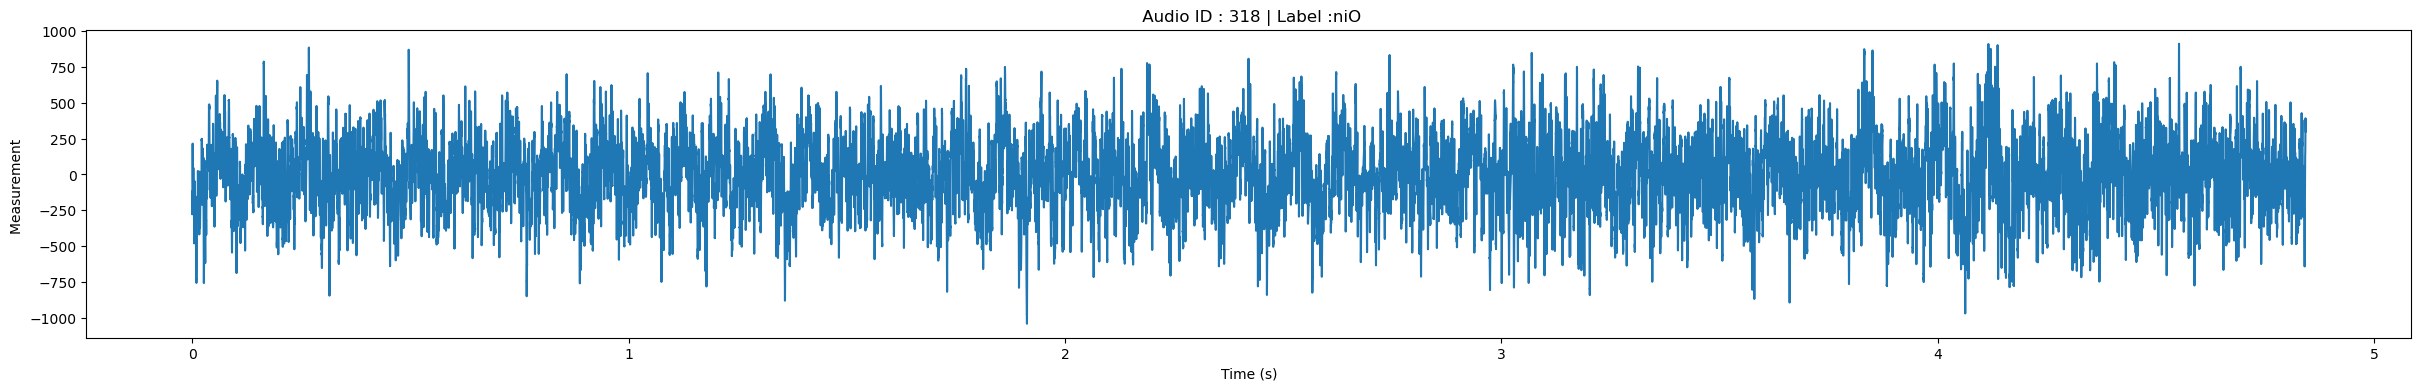

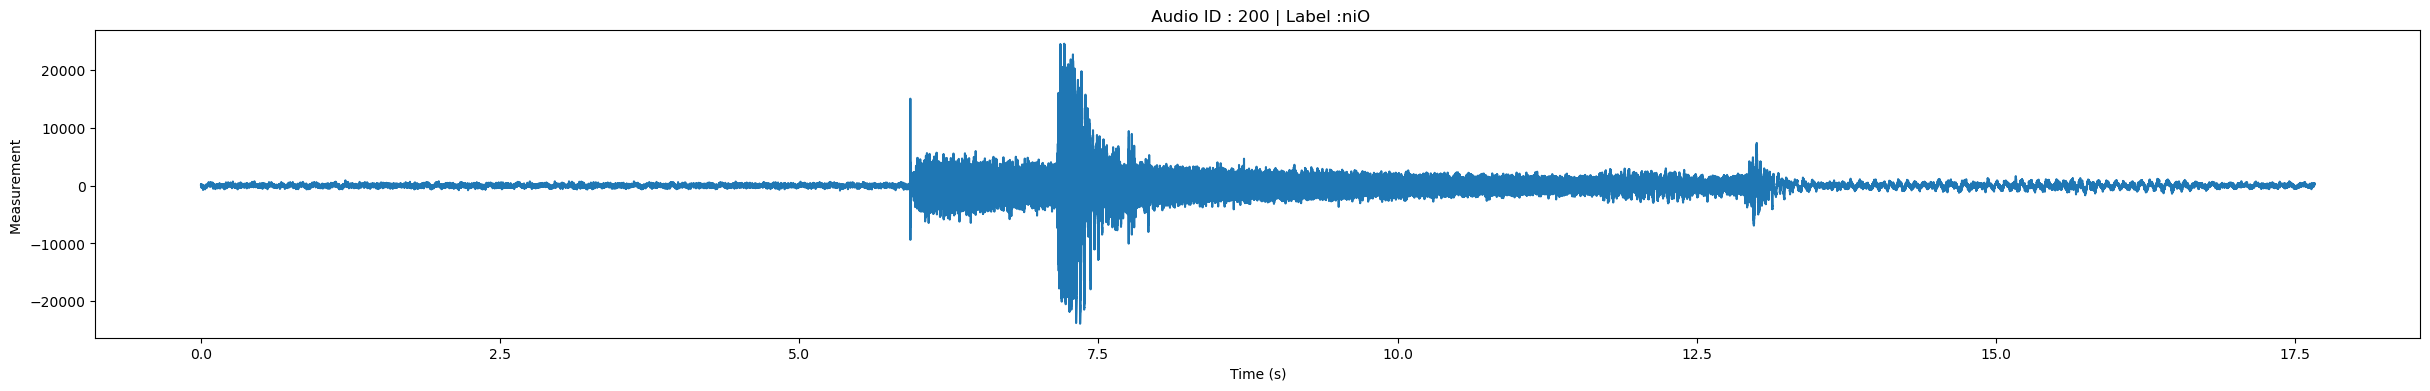

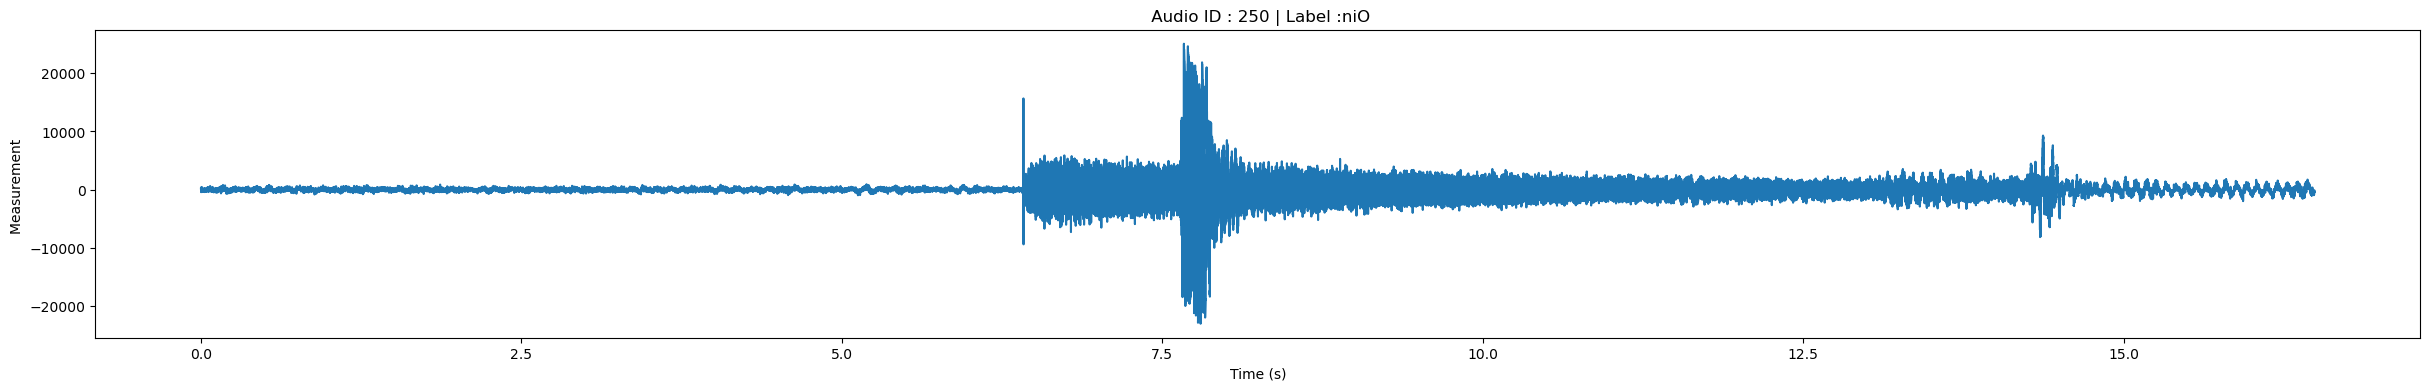

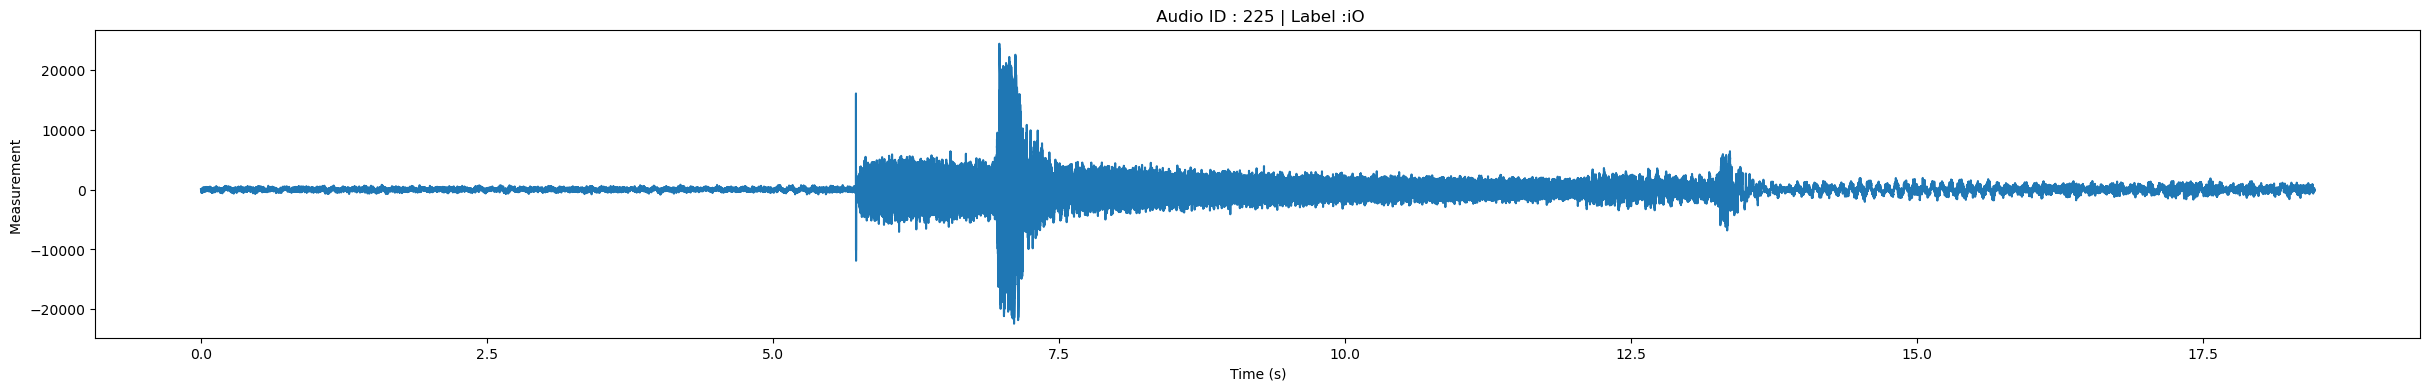

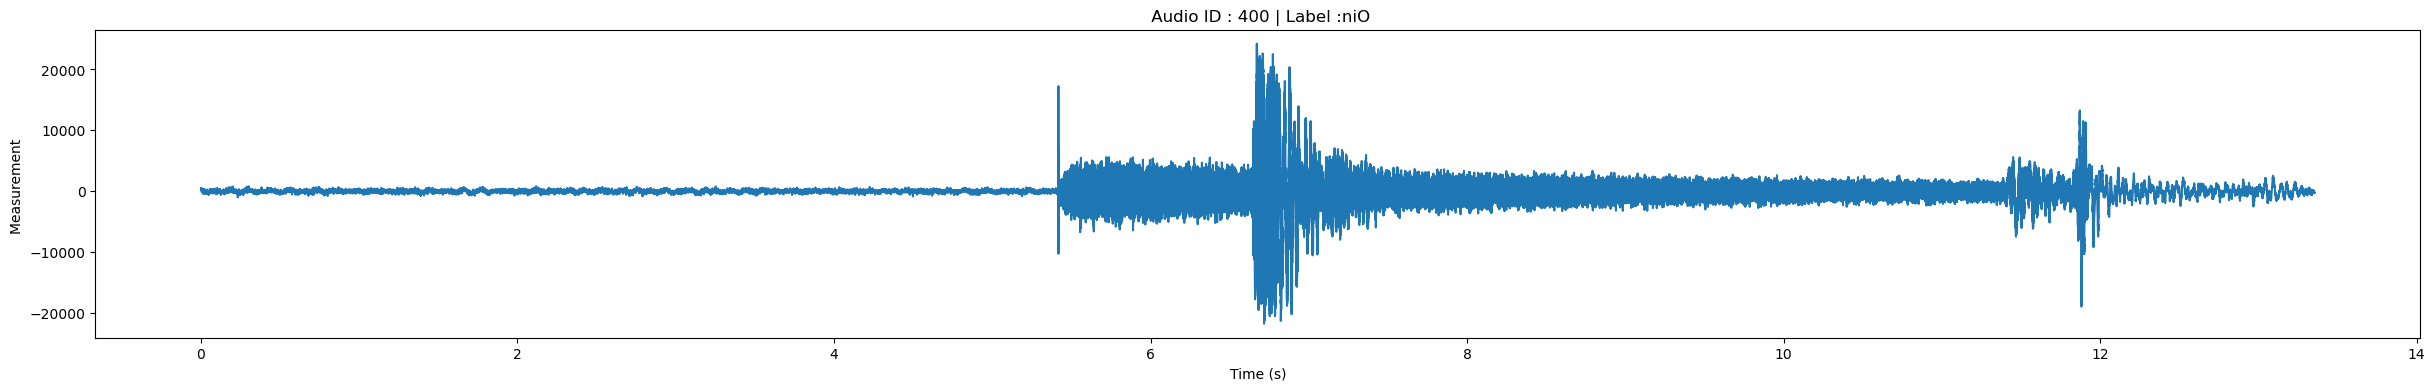

In [67]:
ReadSingleAudio(318)
ReadSingleAudio(200)
ReadSingleAudio(250)
ReadSingleAudio(225)
ReadSingleAudio(400)

### High-pass fliter

[ 30.52215036  30.30919222  29.16472542 ... -12.9359497  -10.05499888
  -0.46627602]


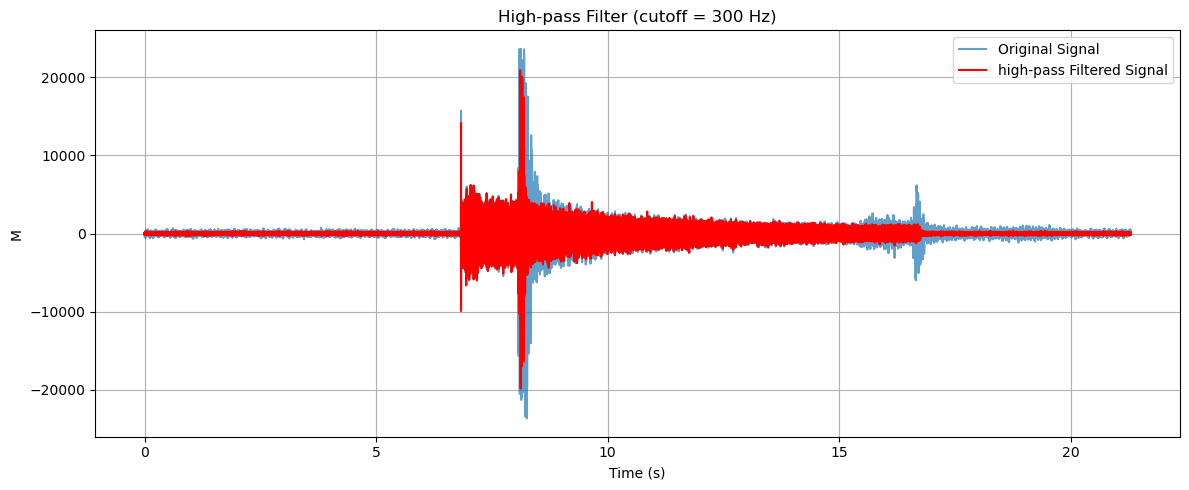

In [83]:
# create high-pass filter to dinimish background noise
from scipy.signal import butter, filtfilt

#Read the CSV file
file_path = os.path.join(Audio_path,"169.csv")
df = pd.read_csv(file_path)

# Extracting the 'Time' and 'M' columns
t = df['Time']
m = df['M']

#define high-pass filter
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs              # Nyquist frequency
    normal_cutoff = cutoff / nyq                # Normalize the cutoff frequency
    b, a = butter(order, normal_cutoff, btype='high', analog=False)             #filter coefficients
    return b, a

#define high-pass filter function
def highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)             #get filter coefficients
    y = filtfilt(b, a, data)                #Apply zero-phase filtering to avoid phase distortion
    return y

#Calculate the sampling frequency from the time data
fs = 1 / (t[1] - t[0])              # Sampling frequency
cutoff = 300               # Cutoff frequency in Hz

# Apply the high-pass filter to the signals
m_filtered = highpass_filter(m, cutoff, fs, order=3)
print(m_filtered)
#Plot the original and filtered signals
plt.figure(figsize=(12, 5))
plt.plot(t, m, label='Original Signal', alpha=0.7)
plt.plot(t, m_filtered, label='high-pass Filtered Signal', color='red')
plt.xlabel('Time (s)')
plt.ylabel('M')
plt.title(f'High-pass Filter (cutoff = {cutoff} Hz)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### FFT

Estimated sampling rate (sr): 48000 Hz


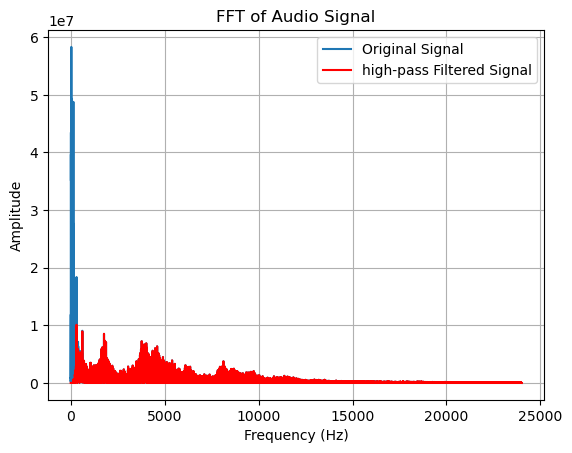

[0.00000000e+00 6.06403622e-02 1.21280724e-01 ... 2.39998181e+04
 2.39998787e+04 2.39999394e+04] 567967.4516294294 58320200.07057584


In [72]:
# FFT
file_path = os.path.join(Audio_path,"250.csv")
df = pd.read_csv(file_path)
# Perform the Fast Fourier Transform (FFT) on the audio signal in column "M"
Y = np.fft.fft(df["M"])
# Compute the frequency bins corresponding to the FFT result
# Estimated sampling rate based on test data
delta_t = df["Time"][1] - df["Time"][0]
sr = round(1 / delta_t)
print(f"Estimated sampling rate (sr): {sr} Hz")

frequencies = np.fft.fftfreq(len(df["M"]), d=1/sr)
#apply high-pass filter
cutoff = 300
m_filtered = highpass_filter(df["M"], cutoff, sr, order=3)
filtered_frequencies = np.fft.fft(m_filtered)

#print(m_filtered)
# Plot the magnitude spectrum (only the positive half of frequencies and amplitudes)
plt.plot(frequencies[:len(frequencies)//2], np.abs(Y)[:len(Y)//2], label='Original Signal')
plt.plot(frequencies[:len(frequencies)//2], np.abs(filtered_frequencies)[:len(filtered_frequencies)//2], label='high-pass Filtered Signal', color='red')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("FFT of Audio Signal")
plt.legend()
plt.grid(True)
plt.show()

peak_freq = frequencies[:len(frequencies)//2]
mean_amp = np.mean(np.abs(Y[:len(Y)//2]))
max_amp = np.max(np.abs(Y[:len(Y)//2]))

print(peak_freq, mean_amp, max_amp)


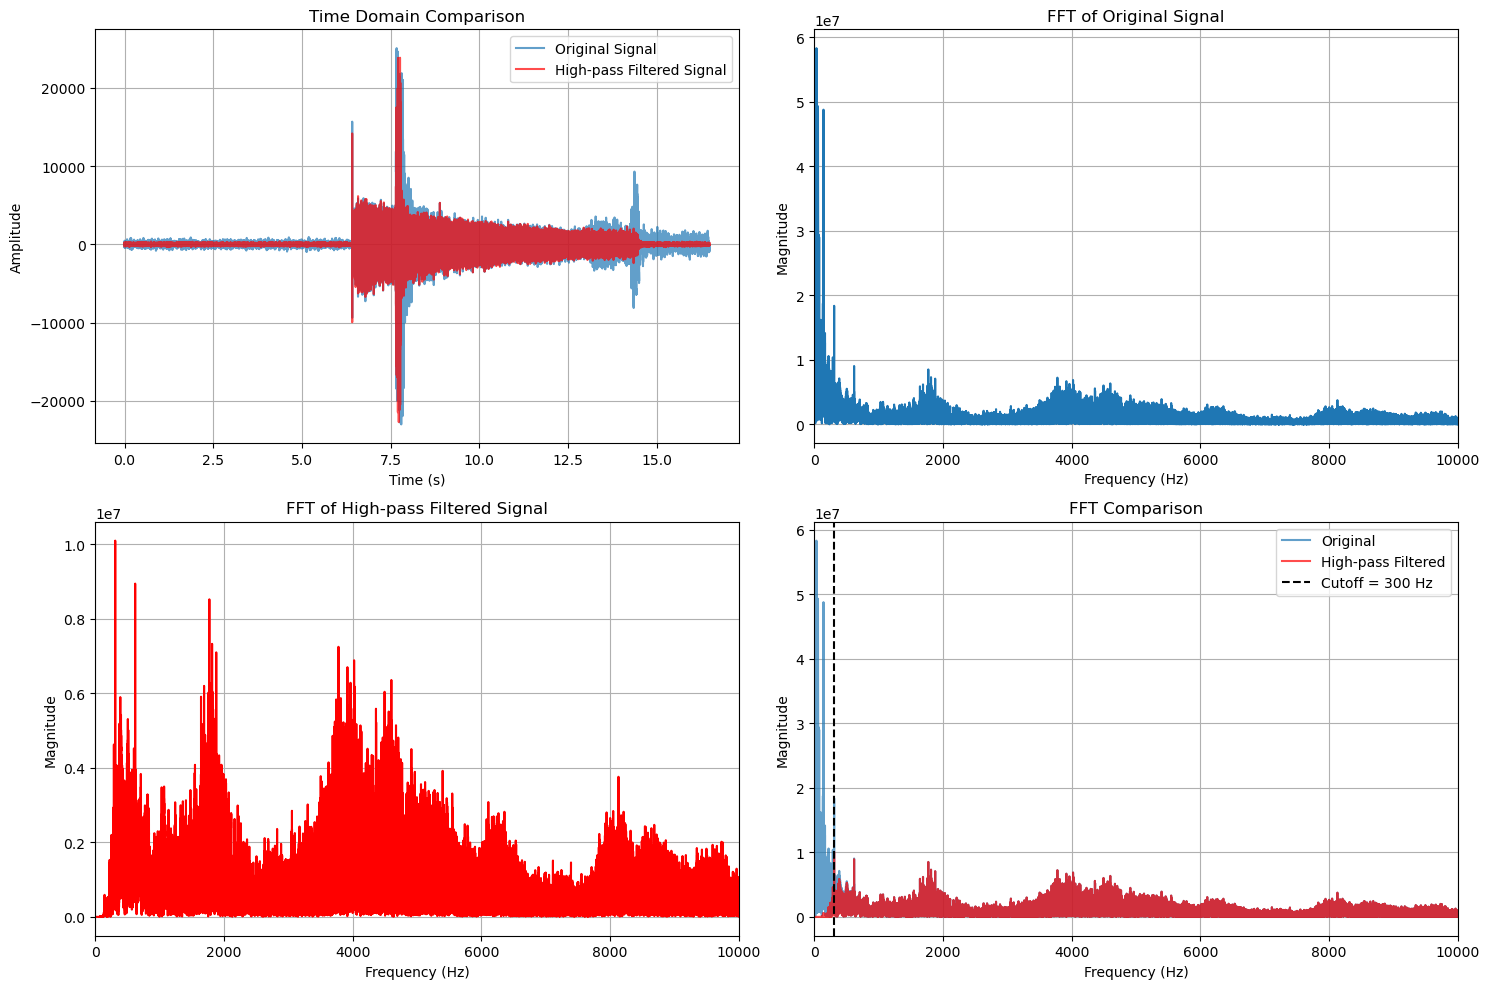

Sampling frequency: 48000.0 Hz
Cutoff frequency: 300 Hz

Original signal:
  Low-frequency energy (<300Hz): 7.23e+17
  High-frequency energy (≥300Hz): 2.66e+17

Filtered signal:
  Low-frequency energy (<300Hz): 2.17e+15
  High-frequency energy (≥300Hz): 2.53e+17

Filtering performance:
  Low-frequency energy reduction: 99.7%
  High-frequency energy preservation: 95.1%


In [74]:


# Read data
file_path = os.path.join(Audio_path, "250.csv")
df = pd.read_csv(file_path)
t = df['Time']
m = df['M']

# Your high-pass filter function (unchanged)
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Calculate sampling frequency
fs = 1 / (t[1] - t[0])
cutoff = 300

# Apply high-pass filter
m_filtered = highpass_filter(m, cutoff, fs, order=3)

# Calculate FFT - original signal and filtered signal
Y_original = np.fft.fft(m)
Y_filtered = np.fft.fft(m_filtered)
frequencies = np.fft.fftfreq(len(m), d=1/fs)

# Take only positive frequency components
pos_freq_idx = frequencies >= 0
frequencies_pos = frequencies[pos_freq_idx]
Y_original_pos = Y_original[pos_freq_idx]
Y_filtered_pos = Y_filtered[pos_freq_idx]

# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Time domain comparison
axes[0, 0].plot(t, m, label='Original Signal', alpha=0.7)
axes[0, 0].plot(t, m_filtered, label='High-pass Filtered Signal', color='red', alpha=0.7)
axes[0, 0].set_xlabel('Time (s)')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_title('Time Domain Comparison')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Frequency domain - original signal
axes[0, 1].plot(frequencies_pos, np.abs(Y_original_pos))
axes[0, 1].set_xlabel('Frequency (Hz)')
axes[0, 1].set_ylabel('Magnitude')
axes[0, 1].set_title('FFT of Original Signal')
axes[0, 1].set_xlim(0, 10000)  # Limit display range for better observation
axes[0, 1].grid(True)

# Frequency domain - filtered signal
axes[1, 0].plot(frequencies_pos, np.abs(Y_filtered_pos), color='red')
axes[1, 0].set_xlabel('Frequency (Hz)')
axes[1, 0].set_ylabel('Magnitude')
axes[1, 0].set_title('FFT of High-pass Filtered Signal')
axes[1, 0].set_xlim(0, 10000)
axes[1, 0].grid(True)

# Frequency domain overlay comparison
axes[1, 1].plot(frequencies_pos, np.abs(Y_original_pos), label='Original', alpha=0.7)
axes[1, 1].plot(frequencies_pos, np.abs(Y_filtered_pos), label='High-pass Filtered', color='red', alpha=0.7)
axes[1, 1].axvline(x=cutoff, color='black', linestyle='--', label=f'Cutoff = {cutoff} Hz')
axes[1, 1].set_xlabel('Frequency (Hz)')
axes[1, 1].set_ylabel('Magnitude')
axes[1, 1].set_title('FFT Comparison')
axes[1, 1].set_xlim(0, 10000)
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Analyze filtering performance
print(f"Sampling frequency: {fs:.1f} Hz")
print(f"Cutoff frequency: {cutoff} Hz")

# Calculate low-frequency and high-frequency energy
low_freq_mask = frequencies_pos < cutoff
high_freq_mask = frequencies_pos >= cutoff

# Low-frequency and high-frequency energy of original signal
low_energy_orig = np.sum(np.abs(Y_original_pos[low_freq_mask])**2)
high_energy_orig = np.sum(np.abs(Y_original_pos[high_freq_mask])**2)

# Low-frequency and high-frequency energy of filtered signal
low_energy_filt = np.sum(np.abs(Y_filtered_pos[low_freq_mask])**2)
high_energy_filt = np.sum(np.abs(Y_filtered_pos[high_freq_mask])**2)

print(f"\nOriginal signal:")
print(f"  Low-frequency energy (<{cutoff}Hz): {low_energy_orig:.2e}")
print(f"  High-frequency energy (≥{cutoff}Hz): {high_energy_orig:.2e}")

print(f"\nFiltered signal:")
print(f"  Low-frequency energy (<{cutoff}Hz): {low_energy_filt:.2e}")
print(f"  High-frequency energy (≥{cutoff}Hz): {high_energy_filt:.2e}")

print(f"\nFiltering performance:")
print(f"  Low-frequency energy reduction: {(1 - low_energy_filt/low_energy_orig)*100:.1f}%")
print(f"  High-frequency energy preservation: {(high_energy_filt/high_energy_orig)*100:.1f}%")

### STFT

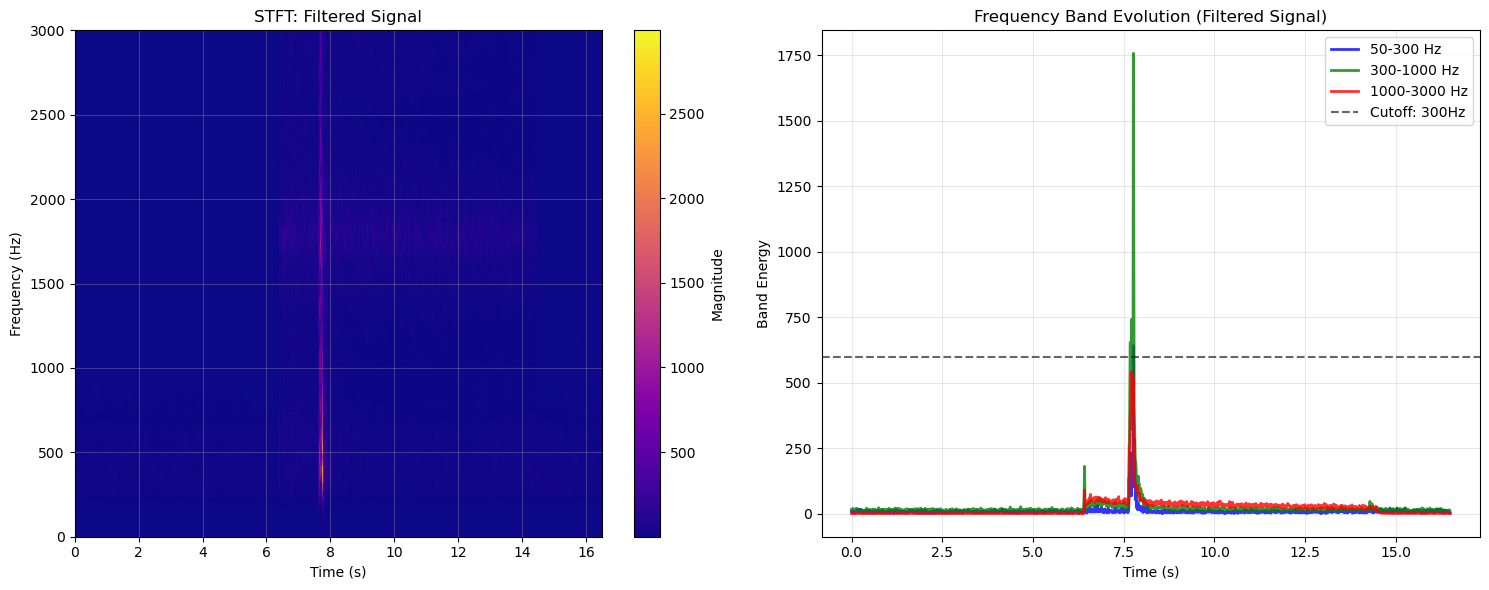

STFT Analysis - Filtered Signal:
Sampling frequency: 48000.0 Hz
Cutoff frequency: 300 Hz
Window size: 1024 samples (0.021 s)
Frequency resolution: 46.88 Hz
Time resolution: 0.011 s

STFT Matrix: (513, 1547) (freq × time)
Frequency range: 0 - 24000.0 Hz
Time range: 0 - 16.491 s

Filtered Signal Energy Analysis:
Total energy: 9.59e+08

Frequency Band Energy:
Low band (50-300 Hz): 1.10e+01
Mid band (300-1000 Hz): 2.50e+01
High band (1000-3000 Hz): 2.17e+01

Dominant Frequency Analysis:
Mean: 1802.9 Hz
Std: 1659.6 Hz
Range: [234.4, 8156.2] Hz

To modify parameters:
WINDOW_SIZE = 1024  # Change frequency resolution
OVERLAP = 512      # Change time resolution
cutoff = 300        # Change filter cutoff frequency


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import stft, butter, filtfilt
import os

# =============================================================================
# STFT PARAMETERS
# =============================================================================
WINDOW_SIZE = 1024    # Window size for STFT
OVERLAP = 512         # Overlap between windows
WINDOW_TYPE = 'hann'  # Window type
# =============================================================================

# Read data
file_path = os.path.join(Audio_path, "250.csv")
df = pd.read_csv(file_path)
t = df['Time']
m = df['M']

# High-pass filter functions
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Calculate sampling frequency
fs = 1 / (t[1] - t[0])
cutoff = 300

# Apply high-pass filter
m_filtered = highpass_filter(m, cutoff, fs, order=3)

# Calculate STFT for filtered signal only
def calculate_stft(signal, fs, nperseg=WINDOW_SIZE, noverlap=OVERLAP, window=WINDOW_TYPE):
    """Calculate STFT of signal"""
    f, t_stft, Zxx = stft(signal, fs, window=window, nperseg=nperseg, noverlap=noverlap)
    return f, t_stft, Zxx

# Perform STFT analysis on filtered signal
f_filt, t_stft_filt, Zxx_filt = calculate_stft(m_filtered, fs)

# Create plots for filtered signal only
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: STFT spectrogram of filtered signal
im1 = axes[0].pcolormesh(t_stft_filt, f_filt, np.abs(Zxx_filt), shading='gouraud', cmap='plasma')
axes[0].set_ylabel('Frequency (Hz)')
axes[0].set_xlabel('Time (s)')
axes[0].set_title('STFT: Filtered Signal')
axes[0].set_ylim(0, 3000)
axes[0].grid(True, alpha=0.3)
plt.colorbar(im1, ax=axes[0], label='Magnitude')

# Plot 2: Frequency band evolution over time
# Define frequency bands
low_band_idx = (f_filt >= 50) & (f_filt <= 300)
mid_band_idx = (f_filt >= 300) & (f_filt <= 1000)
high_band_idx = (f_filt >= 1000) & (f_filt <= 3000)

# Calculate band energies over time for filtered signal
low_energy_filt = np.mean(np.abs(Zxx_filt[low_band_idx, :]), axis=0)
mid_energy_filt = np.mean(np.abs(Zxx_filt[mid_band_idx, :]), axis=0)
high_energy_filt = np.mean(np.abs(Zxx_filt[high_band_idx, :]), axis=0)

# Plot frequency bands
axes[1].plot(t_stft_filt, low_energy_filt, 'b-', alpha=0.8, label='50-300 Hz', linewidth=2)
axes[1].plot(t_stft_filt, mid_energy_filt, 'g-', alpha=0.8, label='300-1000 Hz', linewidth=2)
axes[1].plot(t_stft_filt, high_energy_filt, 'r-', alpha=0.8, label='1000-3000 Hz', linewidth=2)

# Add cutoff frequency reference line
axes[1].axhline(y=np.mean([low_energy_filt.max(), mid_energy_filt.max()]) * 0.5, 
                color='black', linestyle='--', alpha=0.6, label=f'Cutoff: {cutoff}Hz')

axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Band Energy')
axes[1].set_title('Frequency Band Evolution (Filtered Signal)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print analysis for filtered signal
print(f"STFT Analysis - Filtered Signal:")
print(f"{'='*40}")
print(f"Sampling frequency: {fs:.1f} Hz")
print(f"Cutoff frequency: {cutoff} Hz")
print(f"Window size: {WINDOW_SIZE} samples ({WINDOW_SIZE/fs:.3f} s)")
print(f"Frequency resolution: {fs/WINDOW_SIZE:.2f} Hz")
print(f"Time resolution: {(WINDOW_SIZE-OVERLAP)/fs:.3f} s")

print(f"\nSTFT Matrix: {Zxx_filt.shape} (freq × time)")
print(f"Frequency range: 0 - {f_filt[-1]:.1f} Hz")
print(f"Time range: 0 - {t_stft_filt[-1]:.3f} s")

print(f"\nFiltered Signal Energy Analysis:")
total_energy = np.sum(np.abs(Zxx_filt)**2)
print(f"Total energy: {total_energy:.2e}")

# Frequency band analysis
print(f"\nFrequency Band Energy:")
print(f"Low band (50-300 Hz): {np.mean(low_energy_filt):.2e}")
print(f"Mid band (300-1000 Hz): {np.mean(mid_energy_filt):.2e}")
print(f"High band (1000-3000 Hz): {np.mean(high_energy_filt):.2e}")

# Find dominant frequency over time
dominant_freqs = f_filt[np.argmax(np.abs(Zxx_filt), axis=0)]
print(f"\nDominant Frequency Analysis:")
print(f"Mean: {np.mean(dominant_freqs):.1f} Hz")
print(f"Std: {np.std(dominant_freqs):.1f} Hz")
print(f"Range: [{np.min(dominant_freqs):.1f}, {np.max(dominant_freqs):.1f}] Hz")

print(f"\nTo modify parameters:")
print(f"WINDOW_SIZE = {WINDOW_SIZE}  # Change frequency resolution")
print(f"OVERLAP = {OVERLAP}      # Change time resolution")
print(f"cutoff = {cutoff}        # Change filter cutoff frequency")

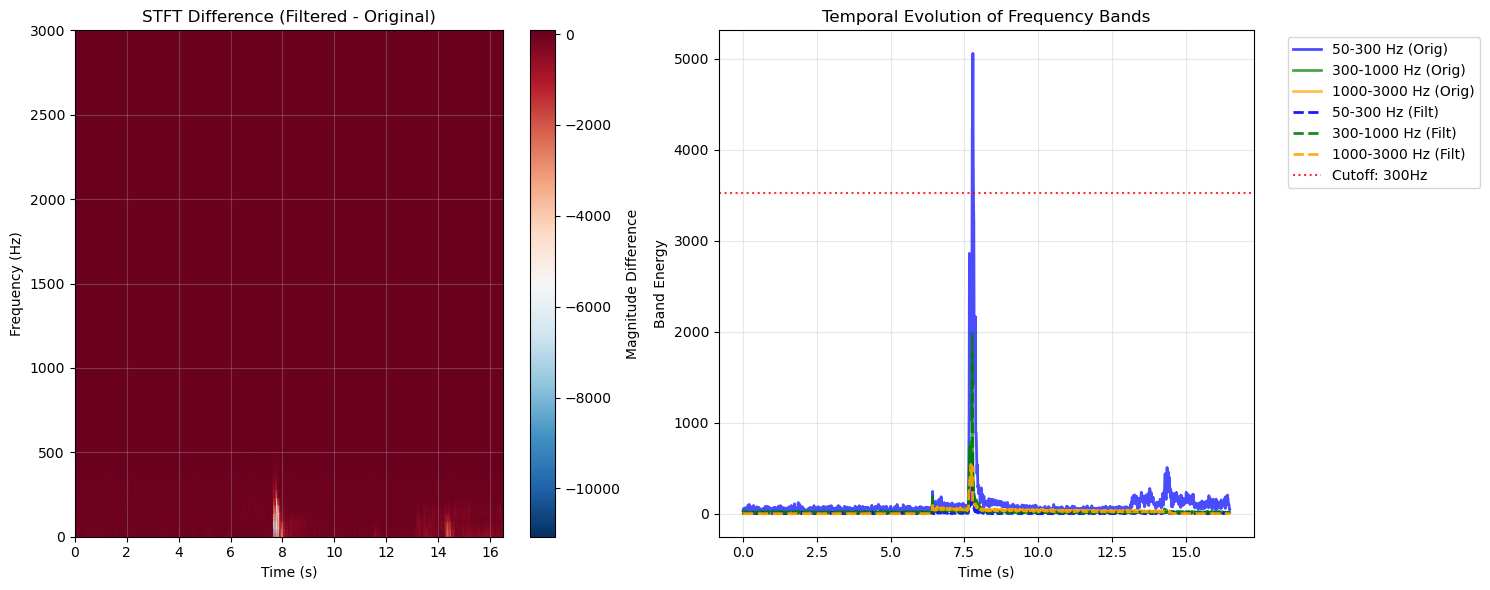

STFT Analysis Results:
Sampling frequency: 48000.0 Hz
Window size: 1024 samples (0.021 s)
Frequency resolution: 46.88 Hz
Time resolution: 0.011 s

Energy Analysis:
Energy retention: 24.3%

Frequency Band Analysis:
Low band (50-300 Hz):
  Original: 1.15e+02, Filtered: 1.10e+01
  Reduction: 90.4%
Mid band (300-1000 Hz):
  Original: 2.82e+01, Filtered: 2.50e+01
  Reduction: 11.1%
High band (1000-3000 Hz):
  Original: 2.17e+01, Filtered: 2.17e+01
  Change: -0.0%

To modify parameters:
WINDOW_SIZE = 1024  # Change frequency resolution
OVERLAP = 512      # Change time resolution


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import stft, butter, filtfilt
import os

# =============================================================================
# STFT PARAMETERS
# =============================================================================
WINDOW_SIZE = 1024    # Window size for STFT
OVERLAP = 512         # Overlap between windows
WINDOW_TYPE = 'hann'  # Window type
# =============================================================================

# Read data
file_path = os.path.join(Audio_path, "250.csv")
df = pd.read_csv(file_path)
t = df['Time']
m = df['M']

# High-pass filter functions
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Calculate sampling frequency
fs = 1 / (t[1] - t[0])
cutoff = 300

# Apply high-pass filter
m_filtered = highpass_filter(m, cutoff, fs, order=3)

# Calculate STFT for original and filtered signals
def calculate_stft(signal, fs, nperseg=WINDOW_SIZE, noverlap=OVERLAP, window=WINDOW_TYPE):
    """Calculate STFT of signal"""
    f, t_stft, Zxx = stft(signal, fs, window=window, nperseg=nperseg, noverlap=noverlap)
    return f, t_stft, Zxx

# Perform STFT analysis
f_orig, t_stft_orig, Zxx_orig = calculate_stft(m, fs)
f_filt, t_stft_filt, Zxx_filt = calculate_stft(m_filtered, fs)

# Create simplified plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: STFT difference (filtered - original)
if Zxx_orig.shape == Zxx_filt.shape:
    diff_stft = np.abs(Zxx_filt) - np.abs(Zxx_orig)
    im1 = axes[0].pcolormesh(t_stft_orig, f_orig, diff_stft, shading='gouraud', cmap='RdBu_r')
    axes[0].set_ylabel('Frequency (Hz)')
    axes[0].set_xlabel('Time (s)')
    axes[0].set_title('STFT Difference (Filtered - Original)')
    axes[0].set_ylim(0, 3000)
    axes[0].grid(True, alpha=0.3)
    plt.colorbar(im1, ax=axes[0], label='Magnitude Difference')
else:
    axes[0].text(0.5, 0.5, 'STFT shapes differ\nCannot compute difference', 
                 transform=axes[0].transAxes, ha='center', va='center')
    axes[0].set_title('STFT Difference')

# Plot 2: Temporal evolution of frequency bands
# Define frequency bands
low_band_idx = (f_orig >= 50) & (f_orig <= 300)
mid_band_idx = (f_orig >= 300) & (f_orig <= 1000)
high_band_idx = (f_orig >= 1000) & (f_orig <= 3000)

# Calculate band energies over time for original signal
low_energy_orig = np.mean(np.abs(Zxx_orig[low_band_idx, :]), axis=0)
mid_energy_orig = np.mean(np.abs(Zxx_orig[mid_band_idx, :]), axis=0)
high_energy_orig = np.mean(np.abs(Zxx_orig[high_band_idx, :]), axis=0)

# Calculate band energies over time for filtered signal
low_energy_filt = np.mean(np.abs(Zxx_filt[low_band_idx, :]), axis=0)
mid_energy_filt = np.mean(np.abs(Zxx_filt[mid_band_idx, :]), axis=0)
high_energy_filt = np.mean(np.abs(Zxx_filt[high_band_idx, :]), axis=0)

# Plot original signal bands
axes[1].plot(t_stft_orig, low_energy_orig, 'b-', alpha=0.7, label='50-300 Hz (Orig)', linewidth=2)
axes[1].plot(t_stft_orig, mid_energy_orig, 'g-', alpha=0.7, label='300-1000 Hz (Orig)', linewidth=2)
axes[1].plot(t_stft_orig, high_energy_orig, 'orange', alpha=0.7, label='1000-3000 Hz (Orig)', linewidth=2)

# Plot filtered signal bands
axes[1].plot(t_stft_filt, low_energy_filt, 'b--', alpha=0.9, label='50-300 Hz (Filt)', linewidth=2)
axes[1].plot(t_stft_filt, mid_energy_filt, 'g--', alpha=0.9, label='300-1000 Hz (Filt)', linewidth=2)
axes[1].plot(t_stft_filt, high_energy_filt, 'orange', linestyle='--', alpha=0.9, label='1000-3000 Hz (Filt)', linewidth=2)

# Add cutoff frequency reference
axes[1].axhline(y=np.mean([low_energy_orig.max(), mid_energy_orig.max()]), 
                color='red', linestyle=':', alpha=0.8, label=f'Cutoff: {cutoff}Hz')

axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Band Energy')
axes[1].set_title('Temporal Evolution of Frequency Bands')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print simplified analysis
print(f"STFT Analysis Results:")
print(f"{'='*40}")
print(f"Sampling frequency: {fs:.1f} Hz")
print(f"Window size: {WINDOW_SIZE} samples ({WINDOW_SIZE/fs:.3f} s)")
print(f"Frequency resolution: {fs/WINDOW_SIZE:.2f} Hz")
print(f"Time resolution: {(WINDOW_SIZE-OVERLAP)/fs:.3f} s")

print(f"\nEnergy Analysis:")
total_energy_orig = np.sum(np.abs(Zxx_orig)**2)
total_energy_filt = np.sum(np.abs(Zxx_filt)**2)
print(f"Energy retention: {total_energy_filt/total_energy_orig*100:.1f}%")

# Band energy analysis
print(f"\nFrequency Band Analysis:")
print(f"Low band (50-300 Hz):")
print(f"  Original: {np.mean(low_energy_orig):.2e}, Filtered: {np.mean(low_energy_filt):.2e}")
print(f"  Reduction: {(1-np.mean(low_energy_filt)/np.mean(low_energy_orig))*100:.1f}%")

print(f"Mid band (300-1000 Hz):")
print(f"  Original: {np.mean(mid_energy_orig):.2e}, Filtered: {np.mean(mid_energy_filt):.2e}")
print(f"  Reduction: {(1-np.mean(mid_energy_filt)/np.mean(mid_energy_orig))*100:.1f}%")

print(f"High band (1000-3000 Hz):")
print(f"  Original: {np.mean(high_energy_orig):.2e}, Filtered: {np.mean(high_energy_filt):.2e}")
print(f"  Change: {(np.mean(high_energy_filt)/np.mean(high_energy_orig)-1)*100:.1f}%")

print(f"\nTo modify parameters:")
print(f"WINDOW_SIZE = {WINDOW_SIZE}  # Change frequency resolution")
print(f"OVERLAP = {OVERLAP}      # Change time resolution")

### Apply filter on all Data

In [10]:
print(audio_list_with_labels)

[{'id': 169, 'audio':          Unnamed: 0       Time    M
0                 0   0.000000   28
1                 1   0.000021   26
2                 2   0.000042   23
3                 3   0.000063   27
4                 4   0.000083   22
...             ...        ...  ...
1021947     1021947  21.290563  216
1021948     1021948  21.290583  227
1021949     1021949  21.290604  242
1021950     1021950  21.290625  249
1021951     1021951  21.290646  263

[1021952 rows x 3 columns], 'label': 'iO'}, {'id': 170, 'audio':          Unnamed: 0       Time    M
0                 0   0.000000 -293
1                 1   0.000021 -279
2                 2   0.000042 -269
3                 3   0.000063 -257
4                 4   0.000083 -245
...             ...        ...  ...
1262587     1262587  26.303896 -230
1262588     1262588  26.303917 -226
1262589     1262589  26.303937 -227
1262590     1262590  26.303958 -229
1262591     1262591  26.303979 -233

[1262592 rows x 3 columns], 'label': 'iO'}, {'i

In [11]:
from tqdm import tqdm
cutoff = 100  # Cutoff frequency in Hz
order = 3  # Filter order
Audio_list_filt = []
## use tqdm to show process in real time
for audio_data in tqdm(audio_list_with_labels, desc="apply high-pass filter"):
   # get data
   audio_id = audio_data['id']
   df_audio = audio_data['audio'].copy()
   label = audio_data['label']
   
   # calcute fs and apply filter
   t = df_audio['Time'].values
   m = df_audio['M'].values
   fs = 1 / (t[1] - t[0])
   m_filtered = highpass_filter(m, cutoff=100, fs=fs, order=3)
   
   # substitute data
   df_audio['M'] = m_filtered
   
   # add data
   Audio_list_filt.append({
       'id': audio_id,
       'audio': df_audio,
       'label': label
   })  


apply high-pass filter: 100%|██████████| 201/201 [00:29<00:00,  6.88it/s]


In [12]:
print(Audio_list_filt)

[{'id': 169, 'audio':          Unnamed: 0       Time          M
0                 0   0.000000  72.687509
1                 1   0.000021  71.039365
2                 2   0.000042  68.390787
3                 3   0.000063  72.741742
4                 4   0.000083  68.092194
...             ...        ...        ...
1021947     1021947  21.290563 -83.923359
1021948     1021948  21.290583 -75.507221
1021949     1021949  21.290604 -63.097366
1021950     1021950  21.290625 -58.693760
1021951     1021951  21.290646 -47.296368

[1021952 rows x 3 columns], 'label': 'iO'}, {'id': 170, 'audio':          Unnamed: 0       Time          M
0                 0   0.000000 -52.385608
1                 1   0.000021 -40.482330
2                 2   0.000042 -32.577599
3                 3   0.000063 -22.671223
4                 4   0.000083 -12.763011
...             ...        ...        ...
1262587     1262587  26.303896 -29.523751
1262588     1262588  26.303917 -23.823523
1262589     1262589  26.303937

**so we get Audio data which has been applied High-pass filter :Audio_list_file**

### Mean

Combined mean comparison data:
   Number of Measurement  Mean of Audio Label of Audio  Mean of Audio Filtered
0                    169      -0.011418             iO               -0.002351
1                    170       0.014857             iO                0.009428
2                    171       0.057396             iO                0.007450
3                    172      -0.172601             iO               -0.004094
4                    173      -0.183890             iO                0.001616
Data shape: (201, 4)


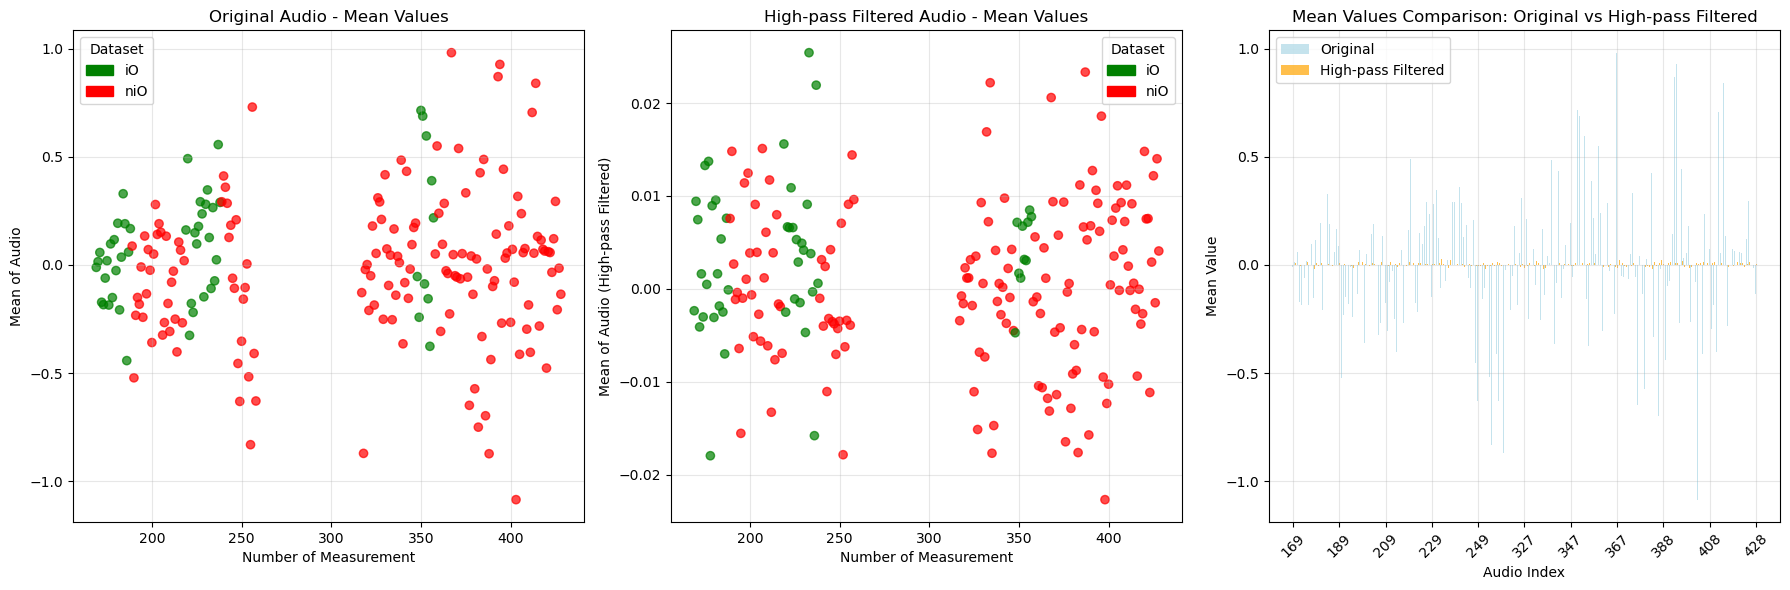


STATISTICAL COMPARISON
Original Audio Mean Statistics:
  Overall Mean: 0.003
  Standard Deviation: 0.328
  Min: -1.086
  Max: 0.981

High-pass Filtered Audio Mean Statistics:
  Overall Mean: 0.001
  Standard Deviation: 0.009
  Min: -0.023
  Max: 0.025

Mean Difference (Original - Filtered):
  Average Difference: 0.002
  Standard Deviation of Difference: 0.329
  Max Absolute Difference: 1.089

Statistics by Dataset:

iO Label of Audio:
  Original Mean: 0.079 ± 0.265
  Filtered Mean: 0.004 ± 0.008
  Count: 50 samples

niO Label of Audio:
  Original Mean: -0.022 ± 0.344
  Filtered Mean: 0.000 ± 0.009
  Count: 151 samples


In [13]:
# Calculate mean of original audio data based on M column
mean_list_original = [df['audio']["M"].values.mean() for df in audio_list_with_labels]
id_list = [audio_data['id'] for audio_data in audio_list_with_labels]
label_list = [audio_data['label'] for audio_data in audio_list_with_labels]
mean_df_original = pd.DataFrame({
    "Number of Measurement": id_list,
    "Mean of Audio": mean_list_original,
    "Label of Audio": label_list
})


# Calculate mean of filtered audio data based on M column
mean_list_filtered = [audio_data["audio"]["M"].values.mean() for audio_data in Audio_list_filt]
id_filtered = [audio_data["id"] for audio_data in Audio_list_filt]
label_filtered = [audio_data['label'] for audio_data in Audio_list_filt]
mean_df_filtered = pd.DataFrame({
    "Number of Measurement": id_filtered,
    "Mean of Audio Filtered": mean_list_filtered,
    "Label of Audio": label_filtered
})

# Combine both datasets for comparison
Audio_mean_comparison = mean_df_original.merge(
    mean_df_filtered[["Number of Measurement", "Mean of Audio Filtered"]], 
    on="Number of Measurement", 
    how="left"
)

print("Combined mean comparison data:")
print(Audio_mean_comparison.head())
print(f"Data shape: {Audio_mean_comparison.shape}")

# Create color mapping for datasets
colors = Audio_mean_comparison['Label of Audio'].map({'iO': 'green', 'niO': 'red'})

# Create subplot comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Original audio means
axes[0].scatter(Audio_mean_comparison['Number of Measurement'], 
                Audio_mean_comparison['Mean of Audio'], 
                c=colors, alpha=0.7)
axes[0].set_xlabel("Number of Measurement")
axes[0].set_ylabel("Mean of Audio")
axes[0].set_title("Original Audio - Mean Values")
axes[0].grid(True, alpha=0.3)

# Create legend
legend_handles = [
    mpatches.Patch(color='green', label='iO'),
    mpatches.Patch(color='red', label='niO')
]
axes[0].legend(handles=legend_handles, title="Dataset")

# Plot 2: Filtered audio means
axes[1].scatter(Audio_mean_comparison['Number of Measurement'], 
                Audio_mean_comparison['Mean of Audio Filtered'], 
                c=colors, alpha=0.7)
axes[1].set_xlabel("Number of Measurement")
axes[1].set_ylabel("Mean of Audio (High-pass Filtered)")
axes[1].set_title("High-pass Filtered Audio - Mean Values")
axes[1].grid(True, alpha=0.3)
axes[1].legend(handles=legend_handles, title="Dataset")

# Plot 3: Side-by-side comparison
x_positions = np.arange(len(Audio_mean_comparison))
width = 0.35

# Create bar plots for comparison
bars1 = axes[2].bar(x_positions - width/2, Audio_mean_comparison['Mean of Audio'], 
                   width, label='Original', alpha=0.7, color='lightblue')
bars2 = axes[2].bar(x_positions + width/2, Audio_mean_comparison['Mean of Audio Filtered'], 
                   width, label='High-pass Filtered', alpha=0.7, color='orange')

axes[2].set_xlabel("Audio Index")
axes[2].set_ylabel("Mean Value")
axes[2].set_title("Mean Values Comparison: Original vs High-pass Filtered")
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Set x-axis labels to show actual measurement numbers (optional, might be crowded)
if len(Audio_mean_comparison) <= 20:  # Only show labels if not too many data points
    axes[2].set_xticks(x_positions)
    axes[2].set_xticklabels(Audio_mean_comparison['Number of Measurement'], rotation=45)
else:
    axes[2].set_xticks(x_positions[::len(x_positions)//10])  # Show every 10th label
    axes[2].set_xticklabels(Audio_mean_comparison['Number of Measurement'].iloc[::len(x_positions)//10], rotation=45)

plt.tight_layout()
plt.show()

# Statistical comparison
print("\n" + "="*50)
print("STATISTICAL COMPARISON")
print("="*50)
print(f"Original Audio Mean Statistics:")
print(f"  Overall Mean: {Audio_mean_comparison['Mean of Audio'].mean():.3f}")
print(f"  Standard Deviation: {Audio_mean_comparison['Mean of Audio'].std():.3f}")
print(f"  Min: {Audio_mean_comparison['Mean of Audio'].min():.3f}")
print(f"  Max: {Audio_mean_comparison['Mean of Audio'].max():.3f}")

print(f"\nHigh-pass Filtered Audio Mean Statistics:")
print(f"  Overall Mean: {Audio_mean_comparison['Mean of Audio Filtered'].mean():.3f}")
print(f"  Standard Deviation: {Audio_mean_comparison['Mean of Audio Filtered'].std():.3f}")
print(f"  Min: {Audio_mean_comparison['Mean of Audio Filtered'].min():.3f}")
print(f"  Max: {Audio_mean_comparison['Mean of Audio Filtered'].max():.3f}")

# Calculate difference statistics
mean_difference = Audio_mean_comparison['Mean of Audio'] - Audio_mean_comparison['Mean of Audio Filtered']
print(f"\nMean Difference (Original - Filtered):")
print(f"  Average Difference: {mean_difference.mean():.3f}")
print(f"  Standard Deviation of Difference: {mean_difference.std():.3f}")
print(f"  Max Absolute Difference: {abs(mean_difference).max():.3f}")

# Group statistics by dataset
print(f"\nStatistics by Dataset:")
for dataset in ['iO', 'niO']:
    mask = Audio_mean_comparison['Label of Audio'] == dataset
    if mask.any():
        orig_means = Audio_mean_comparison.loc[mask, 'Mean of Audio']
        filt_means = Audio_mean_comparison.loc[mask, 'Mean of Audio Filtered']
        print(f"\n{dataset} Label of Audio:")
        print(f"  Original Mean: {orig_means.mean():.3f} ± {orig_means.std():.3f}")
        print(f"  Filtered Mean: {filt_means.mean():.3f} ± {filt_means.std():.3f}")
        print(f"  Count: {mask.sum()} samples")
        

### Std

Combined std comparison data:
   Number of Measurement  Std of Audio Label of Audio  Std of Audio Filtered
0                    169   1485.917267             iO             761.644741
1                    170   1353.614509             iO             730.995281
2                    171   1607.308788             iO             857.518538
3                    172   1684.633736             iO             870.943602
4                    173   1668.711885             iO             846.781460
Data shape: (201, 4)


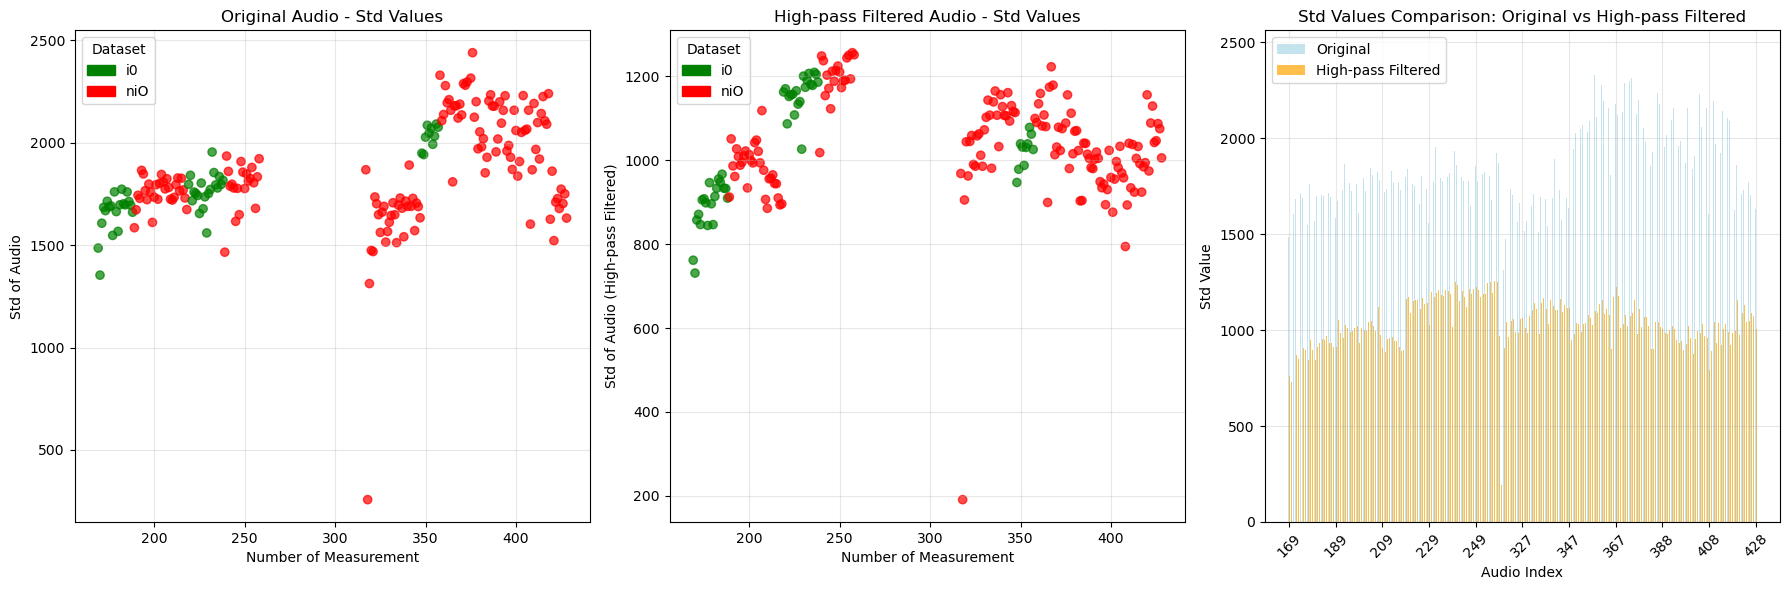


STATISTICAL COMPARISON
Original Audio Std Statistics:
  Overall Mean: 1840.450
  Standard Deviation: 243.568
  Min: 257.260
  Max: 2439.949

High-pass Filtered Audio Std Statistics:
  Overall Mean: 1035.761
  Standard Deviation: 122.166
  Min: 190.817
  Max: 1256.405

Std Difference (Original - Filtered):
  Average Difference: 804.689
  Standard Deviation of Difference: 229.927
  Max Absolute Difference: 1284.212

Statistics by Dataset:

niO Label of Audio:
  Original Std: 1861.504 ± 262.151
  Filtered Std: 1039.547 ± 119.051
  Count: 151 samples


In [14]:
# Calculate std of original audio data based on M column
std_list_original = [audio_data['audio']["M"].values.std() for audio_data in audio_list_with_labels]
id_list = [audio_data['id'] for audio_data in audio_list_with_labels]
label_list = [audio_data['label'] for audio_data in audio_list_with_labels]
std_df_original = pd.DataFrame({
    "Number of Measurement": id_list,
    "Std of Audio": std_list_original,
    "Label of Audio": label_list
})

# Calculate std of filtered audio data based on M column
std_list_filtered = [audio_data["audio"]["M"].values.std() for audio_data in Audio_list_filt]
id_filtered = [audio_data["id"] for audio_data in Audio_list_filt]
label_filtered = [audio_data['label'] for audio_data in Audio_list_filt]
std_df_filtered = pd.DataFrame({
    "Number of Measurement": id_filtered,
    "Std of Audio Filtered": std_list_filtered,
    "Label of Audio": label_filtered
})

# Combine both datasets for comparison
Audio_std_comparison = std_df_original.merge(
    std_df_filtered[["Number of Measurement", "Std of Audio Filtered"]], 
    on="Number of Measurement", 
    how="left"
)

print("Combined std comparison data:")
print(Audio_std_comparison.head())
print(f"Data shape: {Audio_std_comparison.shape}")

# Create color mapping for datasets
colors = Audio_std_comparison['Label of Audio'].map({'iO': 'green', 'niO': 'red'})

# Create subplot comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Original audio stds
axes[0].scatter(Audio_std_comparison['Number of Measurement'], 
                Audio_std_comparison['Std of Audio'], 
                c=colors, alpha=0.7)
axes[0].set_xlabel("Number of Measurement")
axes[0].set_ylabel("Std of Audio")
axes[0].set_title("Original Audio - Std Values")
axes[0].grid(True, alpha=0.3)

# Create legend
legend_handles = [
    mpatches.Patch(color='green', label='i0'),
    mpatches.Patch(color='red', label='niO')
]
axes[0].legend(handles=legend_handles, title="Dataset")

# Plot 2: Filtered audio stds
axes[1].scatter(Audio_std_comparison['Number of Measurement'], 
                Audio_std_comparison['Std of Audio Filtered'], 
                c=colors, alpha=0.7)
axes[1].set_xlabel("Number of Measurement")
axes[1].set_ylabel("Std of Audio (High-pass Filtered)")
axes[1].set_title("High-pass Filtered Audio - Std Values")
axes[1].grid(True, alpha=0.3)
axes[1].legend(handles=legend_handles, title="Dataset")

# Plot 3: Side-by-side comparison
x_positions = np.arange(len(Audio_std_comparison))
width = 0.35

# Create bar plots for comparison
bars1 = axes[2].bar(x_positions - width/2, Audio_std_comparison['Std of Audio'], 
                   width, label='Original', alpha=0.7, color='lightblue')
bars2 = axes[2].bar(x_positions + width/2, Audio_std_comparison['Std of Audio Filtered'], 
                   width, label='High-pass Filtered', alpha=0.7, color='orange')

axes[2].set_xlabel("Audio Index")
axes[2].set_ylabel("Std Value")
axes[2].set_title("Std Values Comparison: Original vs High-pass Filtered")
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Set x-axis labels to show actual measurement numbers (optional, might be crowded)
if len(Audio_std_comparison) <= 20:  # Only show labels if not too many data points
    axes[2].set_xticks(x_positions)
    axes[2].set_xticklabels(Audio_std_comparison['Number of Measurement'], rotation=45)
else:
    axes[2].set_xticks(x_positions[::len(x_positions)//10])  # Show every 10th label
    axes[2].set_xticklabels(Audio_std_comparison['Number of Measurement'].iloc[::len(x_positions)//10], rotation=45)

plt.tight_layout()
plt.show()

# Statistical comparison
print("\n" + "="*50)
print("STATISTICAL COMPARISON")
print("="*50)
print(f"Original Audio Std Statistics:")
print(f"  Overall Mean: {Audio_std_comparison['Std of Audio'].mean():.3f}")
print(f"  Standard Deviation: {Audio_std_comparison['Std of Audio'].std():.3f}")
print(f"  Min: {Audio_std_comparison['Std of Audio'].min():.3f}")
print(f"  Max: {Audio_std_comparison['Std of Audio'].max():.3f}")

print(f"\nHigh-pass Filtered Audio Std Statistics:")
print(f"  Overall Mean: {Audio_std_comparison['Std of Audio Filtered'].mean():.3f}")
print(f"  Standard Deviation: {Audio_std_comparison['Std of Audio Filtered'].std():.3f}")
print(f"  Min: {Audio_std_comparison['Std of Audio Filtered'].min():.3f}")
print(f"  Max: {Audio_std_comparison['Std of Audio Filtered'].max():.3f}")

# Calculate difference statistics
std_difference = Audio_std_comparison['Std of Audio'] - Audio_std_comparison['Std of Audio Filtered']
print(f"\nStd Difference (Original - Filtered):")
print(f"  Average Difference: {std_difference.mean():.3f}")
print(f"  Standard Deviation of Difference: {std_difference.std():.3f}")
print(f"  Max Absolute Difference: {abs(std_difference).max():.3f}")

# Group statistics by dataset
print(f"\nStatistics by Dataset:")
for dataset in ['i0', 'niO']:
    mask = Audio_std_comparison['Label of Audio'] == dataset
    if mask.any():
        orig_stds = Audio_std_comparison.loc[mask, 'Std of Audio']
        filt_stds = Audio_std_comparison.loc[mask, 'Std of Audio Filtered']
        print(f"\n{dataset} Label of Audio:")
        print(f"  Original Std: {orig_stds.mean():.3f} ± {orig_stds.std():.3f}")
        print(f"  Filtered Std: {filt_stds.mean():.3f} ± {filt_stds.std():.3f}")
        print(f"  Count: {mask.sum()} samples")

After that we can find a outlier around 318


In [15]:
std_values = std_df_filtered["Std of Audio Filtered"].values

mean = np.mean(std_values)
std = np.std(std_values)

threshold_upper = mean + 2 * std
threshold_lower = mean - 2 * std

outliers = std_df_filtered[(std_df_filtered["Std of Audio Filtered"] > threshold_upper) | (std_df_filtered["Std of Audio Filtered"] < threshold_lower)]
print(outliers)

    Number of Measurement  Std of Audio Filtered Label of Audio
0                     169             761.644741             iO
1                     170             730.995281             iO
91                    318             190.817065            niO


### RMS

   Number of Measurement  RMS of Audio Dataset
0                    169   1485.917267      iO
1                    170   1353.614509      iO
2                    171   1607.308789      iO
3                    172   1684.633745      iO
4                    173   1668.711895      iO


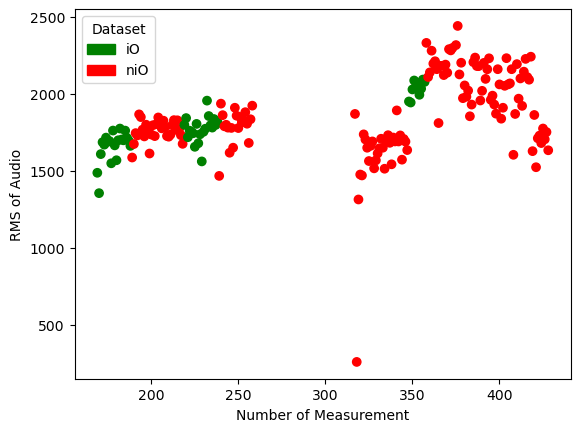

In [16]:
#get RMS of Audio based on M
RMS_list = [np.sqrt((df["M"]**2).mean()) for df in list_Audio]
RMS_df = pd.DataFrame({
    "Number of Measurement": id_Audio,
    "RMS of Audio": RMS_list
})
#merge RMS with Dataset of excel
Audio_RMS_df = RMS_df.merge(df_Usage, on="Number of Measurement", how="left")
print(Audio_RMS_df.head())

colors = Audio_RMS_df['Dataset'].map({'iO': 'green', 'niO': 'red'})
plt.scatter(Audio_RMS_df['Number of Measurement'],Audio_RMS_df['RMS of Audio'],c=colors)
plt.xlabel("Number of Measurement")
plt.ylabel("RMS of Audio")
legend_handles = [
    mpatches.Patch(color='green', label='iO'),
    mpatches.Patch(color='red', label='niO')
]
plt.legend(handles=legend_handles, title="Dataset")
plt.show()


it`s not meaningful, because RMS and std have similar structure, so they have almost same picture.

### Duration time of weld process

Current THRESHOLD = 1000
To change threshold, modify: THRESHOLD = your_value
--------------------------------------------------
Analyzing 201 files with THRESHOLD=1000...


100%|██████████| 201/201 [00:01<00:00, 156.26it/s]
C:\Users\13370\AppData\Local\Temp\ipykernel_5816\3841067159.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_label, labels=labels)



DURATION ANALYSIS RESULTS (THRESHOLD = 1000)
 iO: Mean=10.454s, Std=2.920s, Range=[6.500, 19.490]s, Count=50
niO: Mean=9.859s, Std=3.734s, Range=[0.000, 20.445]s, Count=151
ALL: Mean=10.007s, Std=3.552s


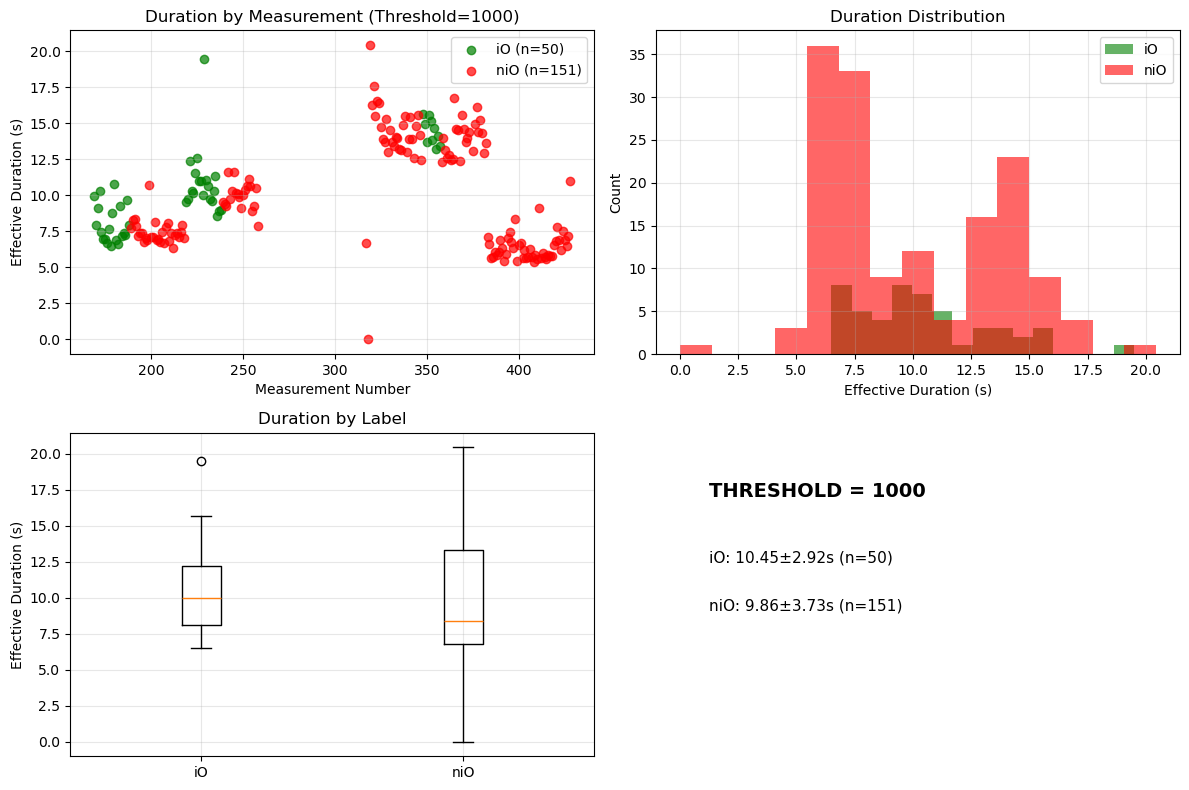


Example analysis for measurement 169:


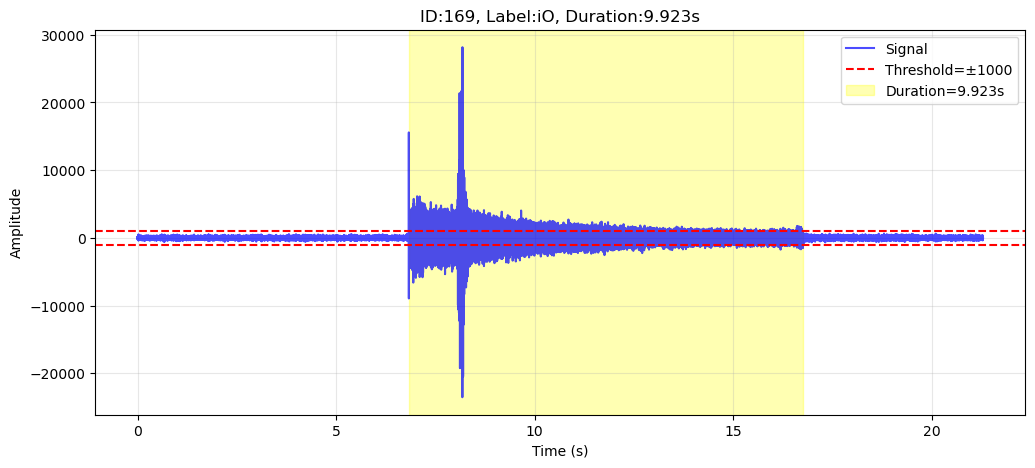


Usage:
• Change THRESHOLD and re-run
• analyze_single(169)  # Analyze specific measurement
• duration_df contains all results


In [ ]:

# =============================================================================
THRESHOLD = 1000  # <-- Change this value as needed
# =============================================================================

def calculate_effective_duration(time_data, filtered_signal):
    """Calculate effective duration using global THRESHOLD"""
    signal_active = np.abs(filtered_signal) > THRESHOLD
    
    if not np.any(signal_active):
        return 0.0
    
    active_indices = np.where(signal_active)[0]
    start_time = time_data[active_indices[0]]
    end_time = time_data[active_indices[-1]]
    
    return end_time - start_time

def analyze_all_durations():
    """Analyze all audio files using global THRESHOLD"""
    duration_list = []
    measurement_list = []
    label_list = []
    
    print(f"Analyzing {len(Audio_list_filt)} files with THRESHOLD={THRESHOLD}...")
    
    for audio_data in tqdm(Audio_list_filt):
        measurement_number = audio_data['id']
        df_filtered = audio_data['audio']
        original_label = audio_data['label']
        
        time_data = df_filtered['Time'].values
        filtered_signal = df_filtered['M'].values
        
        duration = calculate_effective_duration(time_data, filtered_signal)
        
        duration_list.append(duration)
        measurement_list.append(measurement_number)
        label_list.append(original_label)
    
    duration_df = pd.DataFrame({
        'Measurement Number': measurement_list,
        'Effective Duration': duration_list,
        'Label': label_list
    })
    
    return duration_df

def plot_results(duration_df):
    """Plot duration analysis results"""
    color_map = {'iO': 'green', 'niO': 'red'}
    
    plt.figure(figsize=(12, 8))
    
    # Scatter plot
    plt.subplot(2, 2, 1)
    for label in duration_df['Label'].unique():
        subset = duration_df[duration_df['Label'] == label]
        color = color_map.get(label, 'blue')
        plt.scatter(subset['Measurement Number'], subset['Effective Duration'],
                    color=color, label=f'{label} (n={len(subset)})', alpha=0.7)
    plt.xlabel('Measurement Number')
    plt.ylabel('Effective Duration (s)')
    plt.title(f'Duration by Measurement (Threshold={THRESHOLD})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Histogram
    plt.subplot(2, 2, 2)
    for label in duration_df['Label'].unique():
        subset = duration_df[duration_df['Label'] == label]
        color = color_map.get(label, 'blue')
        plt.hist(subset['Effective Duration'], alpha=0.6, label=f'{label}', 
                 color=color, bins=15)
    plt.xlabel('Effective Duration (s)')
    plt.ylabel('Count')
    plt.title('Duration Distribution')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Box plot
    plt.subplot(2, 2, 3)
    labels = duration_df['Label'].unique()
    data_by_label = [duration_df[duration_df['Label'] == label]['Effective Duration'] 
                     for label in labels]
    plt.boxplot(data_by_label, labels=labels)
    plt.ylabel('Effective Duration (s)')
    plt.title('Duration by Label')
    plt.grid(True, alpha=0.3)
    
    # Statistics
    plt.subplot(2, 2, 4)
    plt.text(0.1, 0.8, f"THRESHOLD = {THRESHOLD}", fontsize=14, fontweight='bold')
    y_pos = 0.6
    for label in duration_df['Label'].unique():
        subset = duration_df[duration_df['Label'] == label]
        stats = subset['Effective Duration']
        text = f"{label}: {stats.mean():.2f}±{stats.std():.2f}s (n={len(subset)})"
        plt.text(0.1, y_pos, text, fontsize=11)
        y_pos -= 0.15
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def analyze_single(measurement_id):
    """Analyze single measurement using global THRESHOLD"""
    target_data = None
    for data in Audio_list_filt:
        if data['id'] == measurement_id:
            target_data = data
            break
    
    if target_data is None:
        print(f"Measurement {measurement_id} not found!")
        return
    
    df_filtered = target_data['audio']
    label = target_data['label']
    time_data = df_filtered['Time'].values
    filtered_signal = df_filtered['M'].values
    
    # Calculate
    signal_active = np.abs(filtered_signal) > THRESHOLD
    if np.any(signal_active):
        active_indices = np.where(signal_active)[0]
        start_time = time_data[active_indices[0]]
        end_time = time_data[active_indices[-1]]
        duration = end_time - start_time
    else:
        duration = 0.0
        start_time = end_time = 0.0
    
    # Plot
    plt.figure(figsize=(12, 5))
    plt.plot(time_data, filtered_signal, 'b-', alpha=0.7, label='Signal')
    plt.axhline(y=THRESHOLD, color='r', linestyle='--', label=f'Threshold=±{THRESHOLD}')
    plt.axhline(y=-THRESHOLD, color='r', linestyle='--')
    
    if duration > 0:
        plt.axvspan(start_time, end_time, alpha=0.3, color='yellow', 
                    label=f'Duration={duration:.3f}s')
    
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'ID:{measurement_id}, Label:{label}, Duration:{duration:.3f}s')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return duration

def print_stats(duration_df):
    """Print statistics"""
    print(f"\n{'='*50}")
    print(f"DURATION ANALYSIS RESULTS (THRESHOLD = {THRESHOLD})")
    print(f"{'='*50}")
    
    for label in duration_df['Label'].unique():
        subset = duration_df[duration_df['Label'] == label]
        stats = subset['Effective Duration']
        print(f"{label:>3}: Mean={stats.mean():.3f}s, Std={stats.std():.3f}s, "
              f"Range=[{stats.min():.3f}, {stats.max():.3f}]s, Count={len(subset)}")
    
    overall = duration_df['Effective Duration']
    print(f"{'ALL':>3}: Mean={overall.mean():.3f}s, Std={overall.std():.3f}s")

# =============================================================================
# MAIN EXECUTION
# =============================================================================
print(f"Current THRESHOLD = {THRESHOLD}")
print("To change threshold, modify: THRESHOLD = your_value")
print("-" * 50)

# Run analysis
duration_df = analyze_all_durations()

# Show results
print_stats(duration_df)
plot_results(duration_df)

# Analyze first measurement as example
if len(Audio_list_filt) > 0:
    first_id = Audio_list_filt[0]['id']
    print(f"\nExample analysis for measurement {first_id}:")
    analyze_single(first_id)


Time of Max

Definition: The absolute time point when the signal reaches its maximum amplitude within the active region.

Peak Shift

Definition: The relative position of the maximum amplitude within the active duration, normalized to 0-1 scale.

    0.0: Peak at beginning of active region (front-loaded)

    0.5: Peak at middle of active region (centered)

    1.0: Peak at end of active region (back-loaded)

Peak Features Analysis
Time of Max: Absolute time when maximum occurs
Peak Shift: Relative position of peak in active region (0-1)
------------------------------------------------------------
Calculating peak features for 201 files with THRESHOLD=1000...


Peak analysis: 100%|██████████| 201/201 [00:02<00:00, 77.48it/s] 



PEAK FEATURES ANALYSIS (THRESHOLD = 1000)

iO:
  Time of Max: Mean=7.927s, Std=1.174s
  Peak Shift: Mean=0.222, Std=0.138
  Count: 50

niO:
  Time of Max: Mean=8.381s, Std=1.804s
  Peak Shift: Mean=0.291, Std=0.152
  Count: 151

Overall:
  Time of Max: Mean=8.268s, Std=1.678s
  Peak Shift: Mean=0.274, Std=0.151

Example peak analysis for measurement 169:


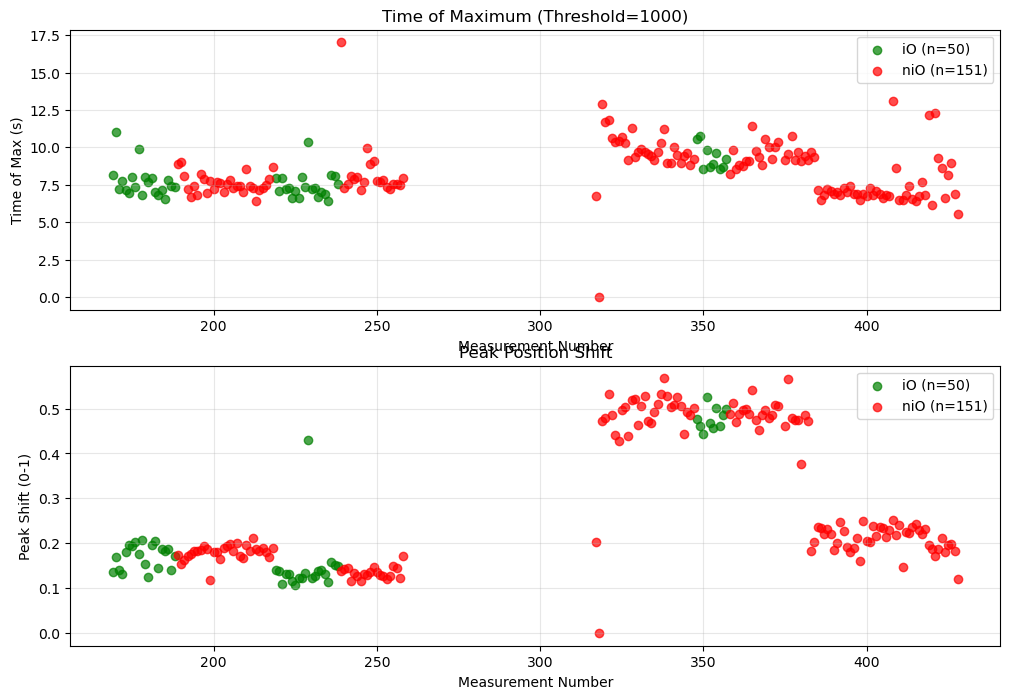

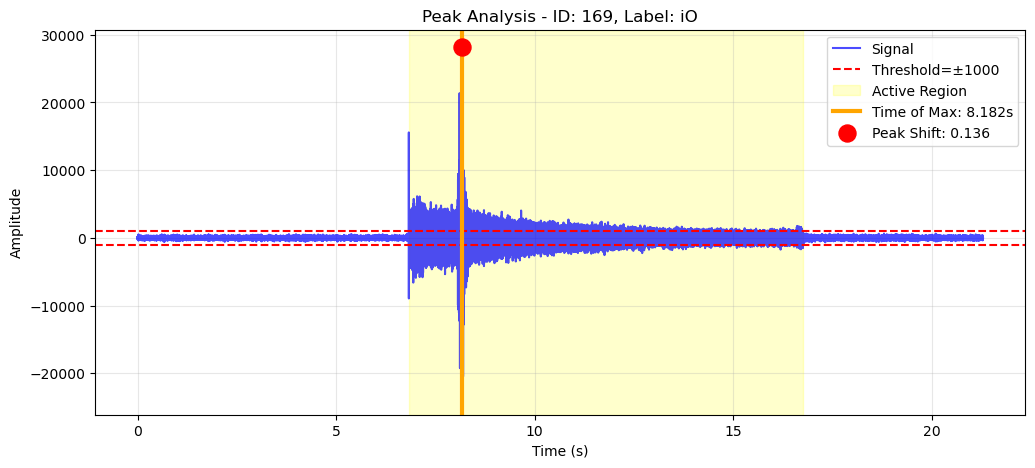


Peak Features for Measurement 169:
Label: iO
Time of Max: 8.182 seconds
Peak Shift: 0.136 (0=start, 0.5=middle, 1=end)


In [51]:
def calculate_peak_features(time_data, filtered_signal):
    """Calculate time of max and peak shift using global THRESHOLD"""
    signal_active = np.abs(filtered_signal) > THRESHOLD
    
    if not np.any(signal_active):
        return 0.0, 0.0  # time_of_max, peak_shift
    
    # Get active region boundaries
    active_indices = np.where(signal_active)[0]
    start_idx = active_indices[0]
    end_idx = active_indices[-1]
    start_time = time_data[start_idx]
    end_time = time_data[end_idx]
    duration = end_time - start_time
    
    # Extract active signal and time
    active_signal = filtered_signal[start_idx:end_idx+1]
    active_time = time_data[start_idx:end_idx+1]
    
    # Find time of maximum absolute value
    max_idx = np.argmax(np.abs(active_signal))
    time_of_max = active_time[max_idx]
    
    # Calculate peak shift (relative position: 0=start, 0.5=middle, 1=end)
    peak_shift = (time_of_max - start_time) / duration if duration > 0 else 0.0
    
    return time_of_max, peak_shift

def analyze_all_peak_features():
    """Analyze peak features for all audio files using global THRESHOLD"""
    time_of_max_list = []
    peak_shift_list = []
    measurement_list = []
    label_list = []
    
    print(f"Calculating peak features for {len(Audio_list_filt)} files with THRESHOLD={THRESHOLD}...")
    
    for audio_data in tqdm(Audio_list_filt, desc="Peak analysis"):
        measurement_number = audio_data['id']
        df_filtered = audio_data['audio']
        original_label = audio_data['label']
        
        time_data = df_filtered['Time'].values
        filtered_signal = df_filtered['M'].values
        
        time_of_max, peak_shift = calculate_peak_features(time_data, filtered_signal)
        
        time_of_max_list.append(time_of_max)
        peak_shift_list.append(peak_shift)
        measurement_list.append(measurement_number)
        label_list.append(original_label)
    
    peak_features_df = pd.DataFrame({
        'Measurement Number': measurement_list,
        'Time of Max': time_of_max_list,
        'Peak Shift': peak_shift_list,
        'Label': label_list
    })
    
    return peak_features_df

def plot_peak_features(peak_features_df):
    """Plot peak features analysis results"""
    color_map = {'iO': 'green', 'niO': 'red'}
    
    plt.figure(figsize=(12, 8))
    
    # Time of Max scatter plot
    plt.subplot(2, 1, 1)
    for label in peak_features_df['Label'].unique():
        subset = peak_features_df[peak_features_df['Label'] == label]
        color = color_map.get(label, 'blue')
        plt.scatter(subset['Measurement Number'], subset['Time of Max'],
                    color=color, label=f'{label} (n={len(subset)})', alpha=0.7)
    plt.xlabel('Measurement Number')
    plt.ylabel('Time of Max (s)')
    plt.title(f'Time of Maximum (Threshold={THRESHOLD})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Peak Shift scatter plot
    plt.subplot(2, 1, 2)
    for label in peak_features_df['Label'].unique():
        subset = peak_features_df[peak_features_df['Label'] == label]
        color = color_map.get(label, 'blue')
        plt.scatter(subset['Measurement Number'], subset['Peak Shift'],
                    color=color, label=f'{label} (n={len(subset)})', alpha=0.7)
    plt.xlabel('Measurement Number')
    plt.ylabel('Peak Shift (0-1)')
    plt.title('Peak Position Shift')
    plt.legend()
    plt.grid(True, alpha=0.3)
    



def analyze_single_peak(measurement_id):
    """Analyze peak features for a single measurement"""
    target_data = None
    for data in Audio_list_filt:
        if data['id'] == measurement_id:
            target_data = data
            break
    
    if target_data is None:
        print(f"Measurement {measurement_id} not found!")
        return
    
    df_filtered = target_data['audio']
    label = target_data['label']
    time_data = df_filtered['Time'].values
    filtered_signal = df_filtered['M'].values
    
    # Calculate peak features
    time_of_max, peak_shift = calculate_peak_features(time_data, filtered_signal)
    
    # Plot with peak markers
    plt.figure(figsize=(12, 5))
    plt.plot(time_data, filtered_signal, 'b-', alpha=0.7, label='Signal')
    plt.axhline(y=THRESHOLD, color='r', linestyle='--', label=f'Threshold=±{THRESHOLD}')
    plt.axhline(y=-THRESHOLD, color='r', linestyle='--')
    
    if time_of_max > 0:
        # Mark active region
        signal_active = np.abs(filtered_signal) > THRESHOLD
        active_indices = np.where(signal_active)[0]
        start_time = time_data[active_indices[0]]
        end_time = time_data[active_indices[-1]]
        
        plt.axvspan(start_time, end_time, alpha=0.2, color='yellow', label='Active Region')
        plt.axvline(x=time_of_max, color='orange', linestyle='-', linewidth=3,
                    label=f'Time of Max: {time_of_max:.3f}s')
        
        # Mark peak point
        max_value = filtered_signal[np.argmin(np.abs(time_data - time_of_max))]
        plt.scatter([time_of_max], [max_value], color='red', s=150, zorder=5,
                   label=f'Peak Shift: {peak_shift:.3f}')
    
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Peak Analysis - ID: {measurement_id}, Label: {label}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f"\nPeak Features for Measurement {measurement_id}:")
    print(f"Label: {label}")
    print(f"Time of Max: {time_of_max:.3f} seconds")
    print(f"Peak Shift: {peak_shift:.3f} (0=start, 0.5=middle, 1=end)")
    
    return time_of_max, peak_shift



# =============================================================================
# MAIN EXECUTION
# =============================================================================
print("Peak Features Analysis")
print("Time of Max: Absolute time when maximum occurs")
print("Peak Shift: Relative position of peak in active region (0-1)")
print("-" * 60)

# Run peak features analysis
peak_features_df = analyze_all_peak_features()

# Show results
print_peak_stats(peak_features_df)
plot_peak_features(peak_features_df)

# Analyze first measurement as example
if len(Audio_list_filt) > 0:
    first_id = Audio_list_filt[0]['id']
    print(f"\nExample peak analysis for measurement {first_id}:")
    analyze_single_peak(first_id)



### Zero Cross Rate

ZCR = Number of zero crossings / Total samples

Calculating ZCR for 201 files...


  0%|          | 0/201 [00:00<?, ?it/s]

100%|██████████| 201/201 [00:03<00:00, 56.15it/s]
C:\Users\13370\AppData\Local\Temp\ipykernel_5816\2024362753.py:58: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_label, labels=labels)



ZERO CROSSING RATE RESULTS:
----------------------------------------
iO: Mean=0.0938, Std=0.0067, Count=50
niO: Mean=0.0893, Std=0.0135, Count=151
ALL: Mean=0.0904, Std=0.0123


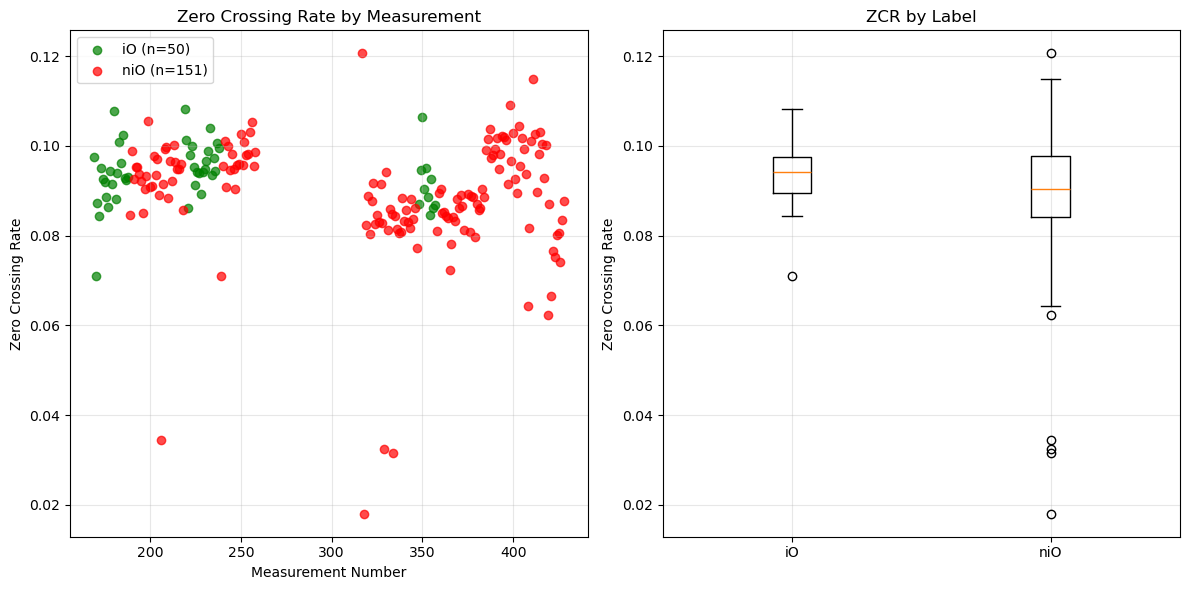


Example analysis for measurement 169:


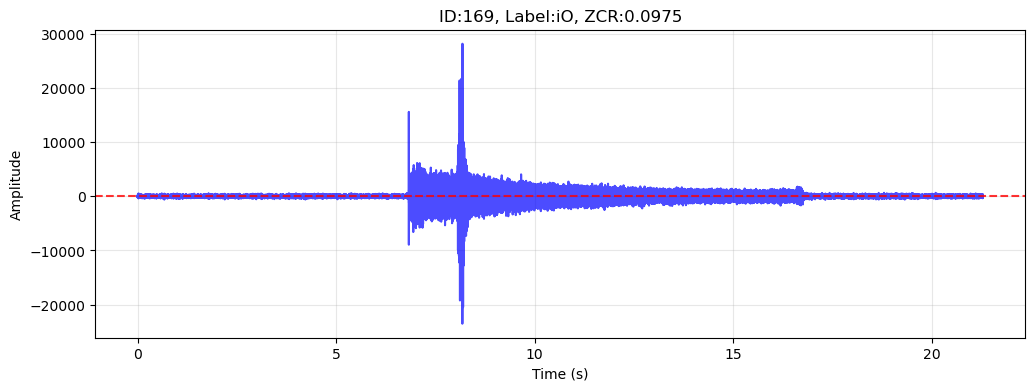


Usage: analyze_single_zcr(169)


In [47]:
def calculate_zcr(signal):
    """Calculate zero crossing rate"""
    sign_changes = np.diff(np.sign(signal - np.mean(signal)))
    zero_crossings = np.sum(np.abs(sign_changes) > 0)
    return zero_crossings / len(signal)

def analyze_all_zcr():
    """Analyze ZCR for all audio files"""
    zcr_list = []
    measurement_list = []
    label_list = []
    
    print(f"Calculating ZCR for {len(Audio_list_filt)} files...")
    
    for audio_data in tqdm(Audio_list_filt):
        measurement_number = audio_data['id']
        df_filtered = audio_data['audio']
        original_label = audio_data['label']
        
        filtered_signal = df_filtered['M'].values
        zcr = calculate_zcr(filtered_signal)
        
        zcr_list.append(zcr)
        measurement_list.append(measurement_number)
        label_list.append(original_label)
    
    zcr_df = pd.DataFrame({
        'Measurement Number': measurement_list,
        'ZCR': zcr_list,
        'Label': label_list
    })
    
    return zcr_df

def plot_zcr(zcr_df):
    """Plot ZCR results"""
    color_map = {'iO': 'green', 'niO': 'red'}
    
    plt.figure(figsize=(12, 6))
    
    # Scatter plot
    plt.subplot(1, 2, 1)
    for label in zcr_df['Label'].unique():
        subset = zcr_df[zcr_df['Label'] == label]
        color = color_map.get(label, 'blue')
        plt.scatter(subset['Measurement Number'], subset['ZCR'],
                    color=color, label=f'{label} (n={len(subset)})', alpha=0.7)
    plt.xlabel('Measurement Number')
    plt.ylabel('Zero Crossing Rate')
    plt.title('Zero Crossing Rate by Measurement')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Box plot
    plt.subplot(1, 2, 2)
    labels = zcr_df['Label'].unique()
    data_by_label = [zcr_df[zcr_df['Label'] == label]['ZCR'] for label in labels]
    plt.boxplot(data_by_label, labels=labels)
    plt.ylabel('Zero Crossing Rate')
    plt.title('ZCR by Label')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def analyze_single_zcr(measurement_id):
    """Analyze single measurement ZCR"""
    target_data = None
    for data in Audio_list_filt:
        if data['id'] == measurement_id:
            target_data = data
            break
    
    if target_data is None:
        print(f"Measurement {measurement_id} not found!")
        return
    
    df_filtered = target_data['audio']
    label = target_data['label']
    time_data = df_filtered['Time'].values
    filtered_signal = df_filtered['M'].values
    
    zcr = calculate_zcr(filtered_signal)
    
    # Plot
    plt.figure(figsize=(12, 4))
    plt.plot(time_data, filtered_signal, 'b-', alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.8)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'ID:{measurement_id}, Label:{label}, ZCR:{zcr:.4f}')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return zcr

def print_zcr_stats(zcr_df):
    """Print ZCR statistics"""
    print(f"\nZERO CROSSING RATE RESULTS:")
    print("-" * 40)
    
    for label in zcr_df['Label'].unique():
        subset = zcr_df[zcr_df['Label'] == label]
        stats = subset['ZCR']
        print(f"{label}: Mean={stats.mean():.4f}, Std={stats.std():.4f}, Count={len(subset)}")
    
    overall = zcr_df['ZCR']
    print(f"ALL: Mean={overall.mean():.4f}, Std={overall.std():.4f}")

# =============================================================================
# MAIN EXECUTION
# =============================================================================
zcr_df = analyze_all_zcr()
print_zcr_stats(zcr_df)
plot_zcr(zcr_df)

# Example single analysis
if len(Audio_list_filt) > 0:
    first_id = Audio_list_filt[0]['id']
    print(f"\nExample analysis for measurement {first_id}:")
    analyze_single_zcr(first_id)

print(f"\nUsage: analyze_single_zcr(169)")

### FFT of all data


Extracting dominant frequencies from 201 filtered audio files...

Extraction complete! Successfully processed 201 audio files

Results preview:
   Measurement Number  Dominant Frequency Label
0                 169          311.497996    iO
1                 170          311.549574    iO
2                 171          122.697368    iO
3                 172          122.804330    iO
4                 173          122.792751    iO
5                 174          123.152314    iO
6                 175          122.641509    iO
7                 176          122.233280    iO
8                 177          122.119035    iO
9                 178          122.188808    iO


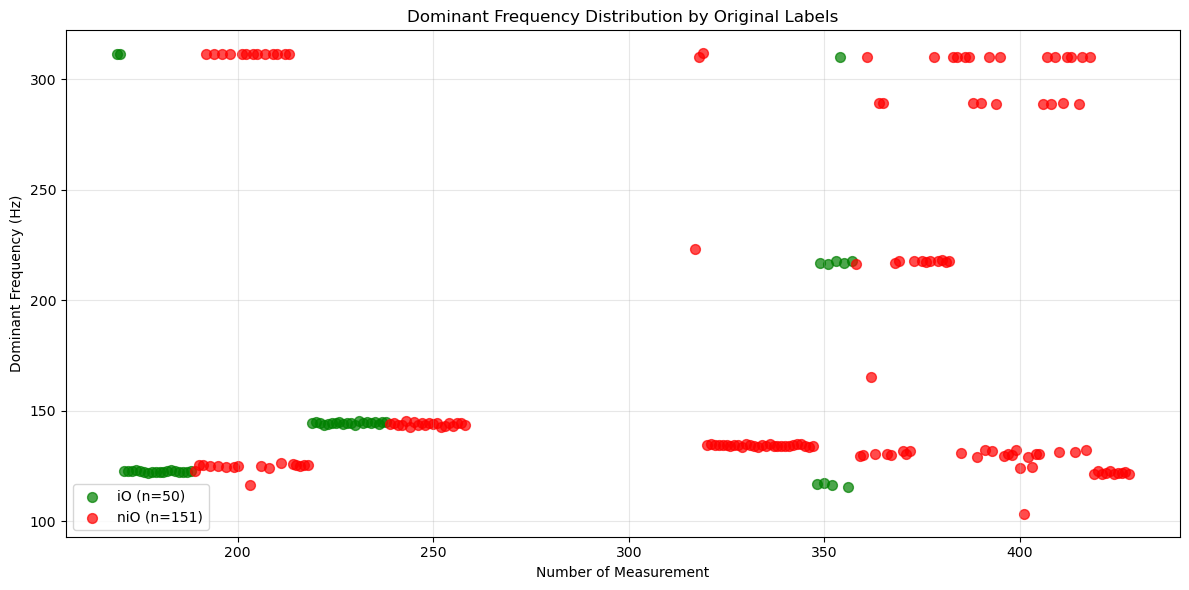


Dominant frequency statistics by original labels:
iO: Mean = 151.6 Hz, Std = 49.2 Hz, Range = [115.6, 311.5] Hz, Count = 50
niO: Mean = 182.8 Hz, Std = 75.5 Hz, Range = [103.5, 311.7] Hz, Count = 151


In [22]:
# Lists to store results
freq_list = []  # List to store dominant frequencies
measurement_list = []  # List to store measurement numbers
label_list = []  # List to store original labels

print(f"Extracting dominant frequencies from {len(Audio_list_filt)} filtered audio files...")

# Loop through all filtered audio data
for audio_data in Audio_list_filt:
            
    # Extract data from the filtered audio
    measurement_number = audio_data['id']
    df_filtered = audio_data['audio']  # Already filtered data
    original_label = audio_data['label']
            
    #print(f"Processing audio ID: {measurement_number}")
            
    # Extract time and filtered measurement data
    t = df_filtered['Time'].values  # Time column
    m_filtered = df_filtered['M'].values  # Filtered measurement column
            
    # Calculate sampling frequency from time data
    fs = 1 / (t[1] - t[0])  # Sampling frequency
            
    # Compute FFT on the filtered signal
    N = len(m_filtered)  # Number of samples
    yf = np.fft.fft(m_filtered)  # Perform Fast Fourier Transform (FFT) - FIXED
    xf = np.fft.fftfreq(N, 1 / fs)  # Generate frequency bins
            
    # Take positive frequencies only
    positive_idxs = xf > 0
    xf_positive = xf[positive_idxs]  # Positive frequencies
    yf_positive = np.abs(yf[positive_idxs])  # Corresponding magnitudes
            
    # Find dominant frequency (frequency with maximum magnitude)
    dom_freq = xf_positive[np.argmax(yf_positive)]
            
    #print(f"  Dominant frequency: {dom_freq:.1f} Hz")
            
    # Store results
    freq_list.append(dom_freq)
    measurement_list.append(measurement_number)
    label_list.append(original_label)
            
# Create DataFrame with results
dominant_freq_df = pd.DataFrame({
    'Measurement Number': measurement_list,
    'Dominant Frequency': freq_list,
    'Label': label_list
})

print(f"\nExtraction complete! Successfully processed {len(dominant_freq_df)} audio files")
print("\nResults preview:")
print(dominant_freq_df.head(10))

# Create scatter plot based on original labels
plt.figure(figsize=(12, 6))

# Define colors for different labels
color_map = {'iO': 'green',
             'niO': 'red'}

# Plot scatter points for each label
for label in dominant_freq_df['Label'].unique():
    subset = dominant_freq_df[dominant_freq_df['Label'] == label]
    color = color_map.get(label, 'blue')  # Default to blue if label not in map
    plt.scatter(subset['Measurement Number'], subset['Dominant Frequency'],
                color=color, label=f'{label} (n={len(subset)})', alpha=0.7, s=50)

plt.xlabel("Number of Measurement")
plt.ylabel("Dominant Frequency (Hz)")
plt.title("Dominant Frequency Distribution by Original Labels")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display frequency statistics by label
print(f"\nDominant frequency statistics by original labels:")
for label in dominant_freq_df['Label'].unique():
    subset = dominant_freq_df[dominant_freq_df['Label'] == label]
    freq_stats = subset['Dominant Frequency']
    print(f"{label}: Mean = {freq_stats.mean():.1f} Hz, Std = {freq_stats.std():.1f} Hz, "
          f"Range = [{freq_stats.min():.1f}, {freq_stats.max():.1f}] Hz, Count = {len(subset)}")

Apply FFT on all filted data to get **Audio_list_fft**

In [ ]:

def apply_fft_to_audio_list(audio_list_filt):
    """
    Apply FFT to all data in Audio_list_filt and return results in the same format
    
    Parameters:
    audio_list_filt: List of dictionaries containing audio data
    
    Returns:
    Audio_list_fft: List of dictionaries with FFT results in the same format
    """
    
    Audio_list_fft = []
    
    print(f"Applying FFT to {len(audio_list_filt)} audio files...")
    
    for i, audio_data in enumerate(audio_list_filt):
        # Extract data from the filtered audio
        measurement_number = audio_data['id']
        df_filtered = audio_data['audio']  # Already filtered data
        original_label = audio_data['label']
        
        # Extract time and filtered measurement data
        t = df_filtered['Time'].values  # Time column
        m_filtered = df_filtered['M'].values  # Filtered measurement column
        
        # Calculate sampling frequency from time data
        fs = 1 / (t[1] - t[0])  # Sampling frequency
        
        # Compute FFT on the filtered signal
        N = len(m_filtered)  # Number of samples
        yf = np.fft.fft(m_filtered)  # Perform Fast Fourier Transform (FFT)
        xf = np.fft.fftfreq(N, 1 / fs)  # Generate frequency bins
        
        # Take positive frequencies only (since we usually only need positive frequencies)
        positive_idxs = xf >= 0  # Include 0 frequency
        xf_positive = xf[positive_idxs]  # Positive frequencies
        yf_positive = yf[positive_idxs]  # Corresponding complex values
        
        # Create DataFrame with FFT results
        fft_df = pd.DataFrame({
            'Frequency': xf_positive,
            'FFT_Real': np.real(yf_positive),
            'FFT_Imag': np.imag(yf_positive),
            'FFT_Magnitude': np.abs(yf_positive),
            'FFT_Phase': np.angle(yf_positive)
        })
        
        # Create dictionary in the same format as original
        fft_data = {
            'id': measurement_number,
            'audio': fft_df,
            'label': original_label
        }
        
        Audio_list_fft.append(fft_data)
        
        # Progress indicator
        if (i + 1) % 50 == 0 or (i + 1) == len(audio_list_filt):
            print(f"Progress: {i + 1}/{len(audio_list_filt)} files processed")
    
    print(f"\nFFT processing complete! Successfully processed {len(Audio_list_fft)} audio files")
    
    return Audio_list_fft

# Apply FFT to all data
Audio_list_fft = apply_fft_to_audio_list(Audio_list_filt)

# Display sample results
print("\nSample FFT results:")
print(f"First file ID: {Audio_list_fft[0]['id']}")
print(f"First file label: {Audio_list_fft[0]['label']}")
print(f"FFT data shape: {Audio_list_fft[0]['audio'].shape}")
print("\nFirst few rows of FFT data:")
print(Audio_list_fft[0]['audio'].head())


Applying FFT to 201 audio files...
Progress: 50/201 files processed
Progress: 100/201 files processed
Progress: 150/201 files processed
Progress: 200/201 files processed
Progress: 201/201 files processed

FFT processing complete! Successfully processed 201 audio files

Sample FFT results:
First file ID: 169
First file label: iO
FFT data shape: (510976, 5)

First few rows of FFT data:
   Frequency     FFT_Real  FFT_Imag  FFT_Magnitude  FFT_Phase
0   0.000000 -2402.572442  0.000000    2402.572442   3.141593
1   0.046969 -2402.572811 -0.009673    2402.572811  -3.141589
2   0.093938 -2402.574514 -0.019385    2402.574514  -3.141585
3   0.140907 -2402.577018 -0.029174    2402.577018  -3.141581
4   0.187876 -2402.580685 -0.038784    2402.580685  -3.141577


### Spectral Centroid

The Spectral Centroid is a fundamental audio feature that represents the "center of mass" of the spectrum. It indicates where the energy of a signal is concentrated in the frequency domain and is often used as a measure of the "brightness" or "timbre" of an audio signal.

Calculating spectral centroids for 201 audio files...
Using frequency range: 0 - 2000 Hz


apply spectral centroids: 100%|██████████| 201/201 [00:06<00:00, 32.58it/s]



Spectral centroid calculation complete!

Spectral Centroid Results Preview:
   Measurement Number  Spectral Centroid Label
0                 169         510.121333    iO
1                 170         432.006558    iO
2                 171         424.918648    iO
3                 172         393.349155    iO
4                 173         447.184316    iO
5                 174         421.401123    iO
6                 175         424.445910    iO
7                 176         424.765806    iO
8                 177         437.793856    iO
9                 178         431.386404    iO

Measurement Number Range: 169 to 428
Total measurements: 201


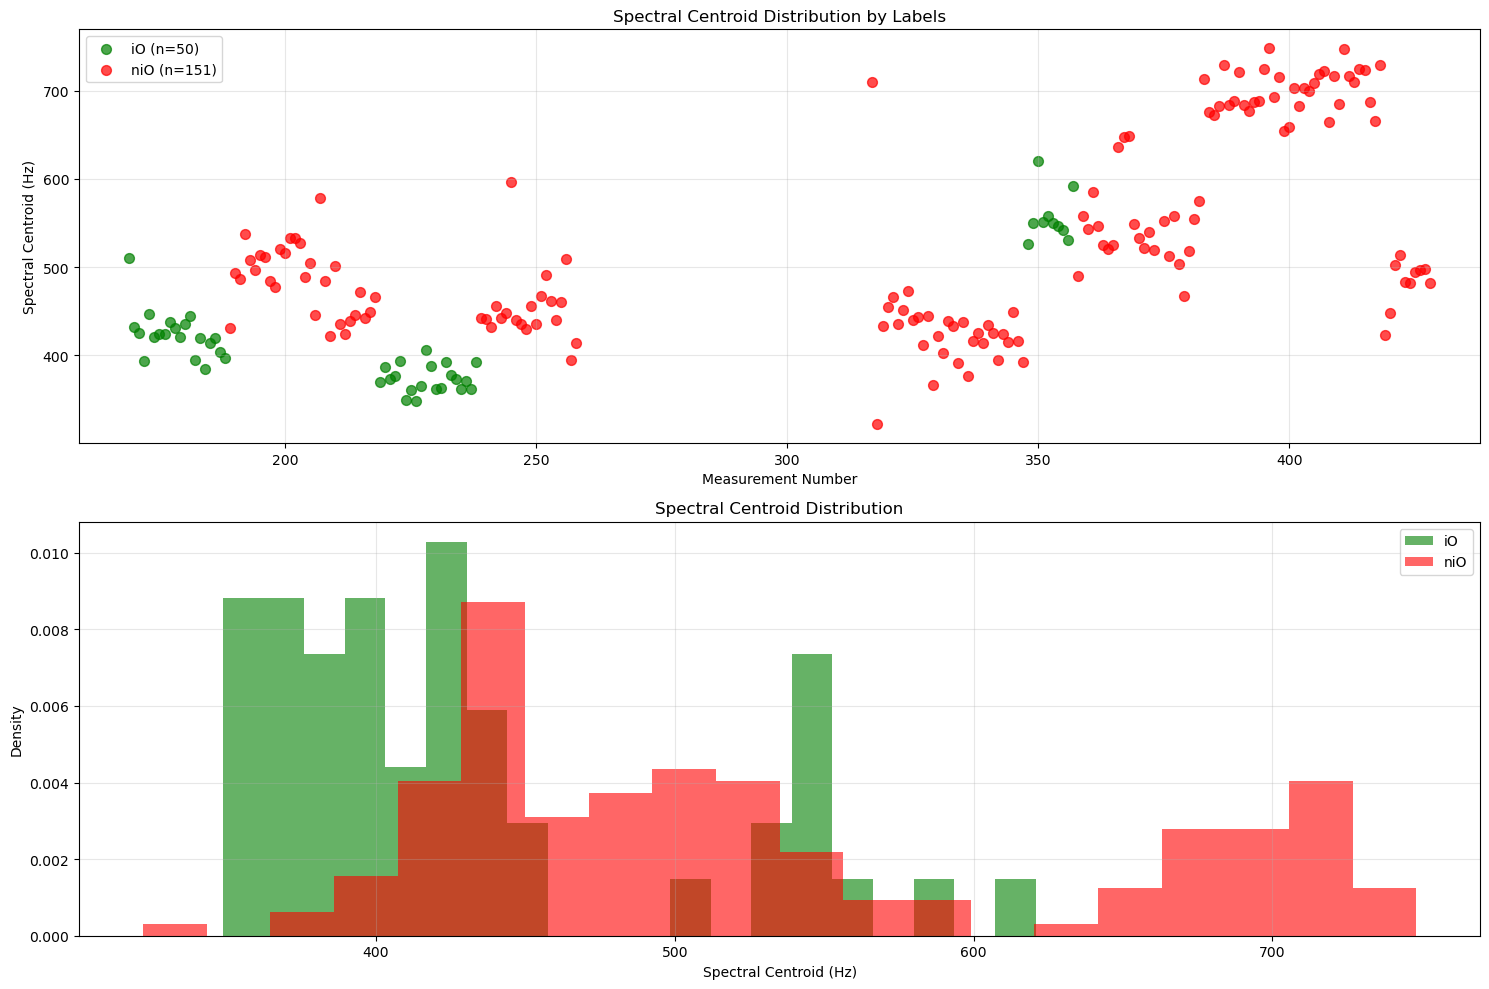


Analyzing spectral centroid for measurement ID: 169


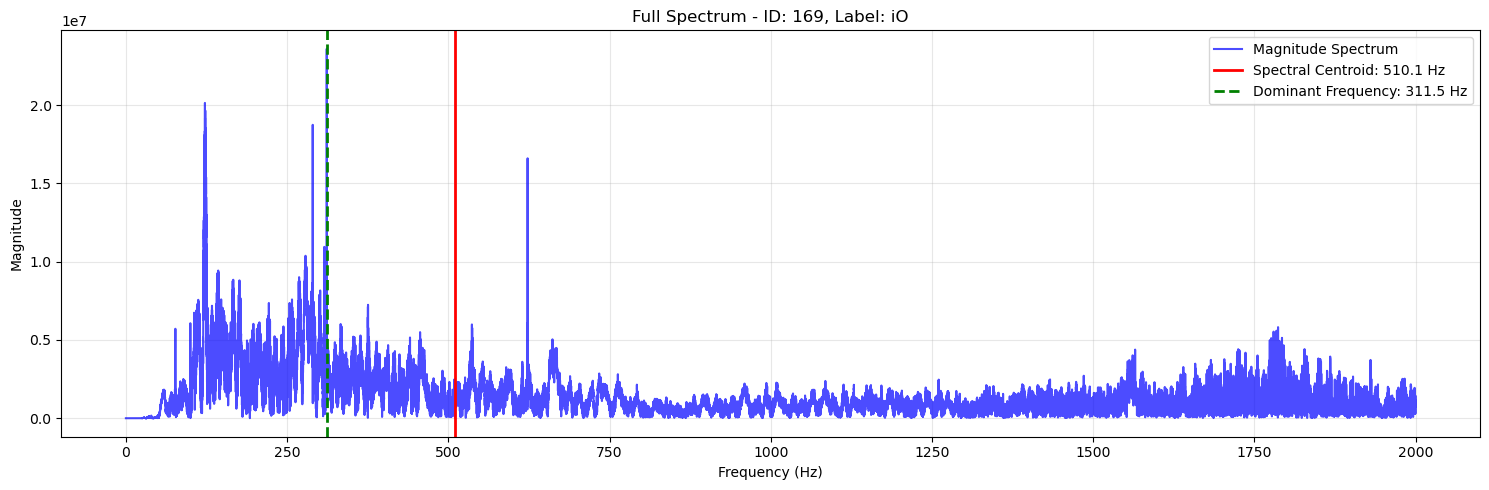


Detailed Analysis for Measurement ID 169:
Label: iO
Spectral Centroid: 510.1 Hz
Dominant Frequency: 311.5 Hz
Difference: 198.6 Hz
Frequency range considered: 0 - 2000 Hz
Mean frequency in range: 1000.0 Hz
Centroid vs Mean frequency difference: 489.9 Hz


In [36]:
def calculate_spectral_centroid(fft_df, max_freq=2000):
    """Calculate spectral centroid from FFT data"""
    
    # Use only positive frequencies and limit to reasonable range
    freq_mask = (fft_df['Frequency'] > 0) & (fft_df['Frequency'] <= max_freq)
    frequencies = fft_df[freq_mask]['Frequency'].values
    magnitudes = fft_df[freq_mask]['FFT_Magnitude'].values
    
    # Optional: Remove very small magnitude values that might be noise
    # magnitude_threshold = np.max(magnitudes) * 0.001  # 0.1% of max magnitude
    # valid_mask = magnitudes > magnitude_threshold
    # frequencies = frequencies[valid_mask]
    # magnitudes = magnitudes[valid_mask]
    
    # Calculate spectral centroid using weighted average
    # Spectral Centroid = Σ(f_i × |X(f_i)|²) / Σ|X(f_i)|²
    power_spectrum = magnitudes ** 2
    
    # Handle edge case where all magnitudes are zero
    total_power = np.sum(power_spectrum)
    if total_power == 0:
        return 0.0
    
    # Calculate weighted sum of frequencies
    weighted_freq_sum = np.sum(frequencies * power_spectrum)
    
    # Calculate spectral centroid
    spectral_centroid = weighted_freq_sum / total_power
    
    return spectral_centroid

def calculate_spectral_centroids_for_all(Audio_list_fft, max_freq=2000):
    """
    Calculate spectral centroids for all audio files in Audio_list_fft
    
    Parameters:
    Audio_list_fft: List of dictionaries containing FFT results
    max_freq: Maximum frequency to consider (Hz)
    
    Returns:
    spectral_centroid_df: DataFrame with spectral centroid results
    """
    
    # Lists to store results
    centroid_list = []
    measurement_list = []
    label_list = []
    
    print(f"Calculating spectral centroids for {len(Audio_list_fft)} audio files...")
    print(f"Using frequency range: 0 - {max_freq} Hz")
    
    for audio_fft in tqdm(Audio_list_fft, desc="apply spectral centroids"):
        # Extract data
        measurement_number = audio_fft['id']
        fft_df = audio_fft['audio']
        original_label = audio_fft['label']
        
        # Calculate spectral centroid with frequency limit
        centroid = calculate_spectral_centroid(fft_df, max_freq=max_freq)
        
        # Store results
        centroid_list.append(centroid)
        measurement_list.append(measurement_number)
        label_list.append(original_label)
    
    # Create DataFrame with results
    spectral_centroid_df = pd.DataFrame({
        'Measurement Number': measurement_list,
        'Spectral Centroid': centroid_list,
        'Label': label_list
    })
    
    print(f"\nSpectral centroid calculation complete!")
    
    return spectral_centroid_df

# Calculate spectral centroids for all data with frequency limit
spectral_centroid_df = calculate_spectral_centroids_for_all(Audio_list_fft, max_freq=2000)

# Display results
print("\nSpectral Centroid Results Preview:")
print(spectral_centroid_df.head(10))

# Get measurement number range for consistent x-axis
all_measurement_numbers = spectral_centroid_df['Measurement Number'].values
x_min = min(all_measurement_numbers)
x_max = max(all_measurement_numbers)

print(f"\nMeasurement Number Range: {x_min} to {x_max}")
print(f"Total measurements: {len(spectral_centroid_df)}")

# Create visualization with consistent x-axis
plt.figure(figsize=(15, 10))

# Define colors for different labels
color_map = {'iO': 'green',
             'niO': 'red'}

# Subplot 1: Scatter plot of spectral centroids (with consistent x-axis)
plt.subplot(2, 1, 1)
for label in spectral_centroid_df['Label'].unique():
    subset = spectral_centroid_df[spectral_centroid_df['Label'] == label]
    color = color_map.get(label, 'blue')
    plt.scatter(subset['Measurement Number'], subset['Spectral Centroid'],
                color=color, label=f'{label} (n={len(subset)})', alpha=0.7, s=50)

plt.xlabel('Measurement Number')
plt.ylabel('Spectral Centroid (Hz)')
plt.title('Spectral Centroid Distribution by Labels')
# Set x-axis limits to match the range of measurement numbers (showing gaps)
plt.xlim(x_min - 10, x_max + 10)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Histogram of spectral centroids
plt.subplot(2, 1, 2)
for label in spectral_centroid_df['Label'].unique():
    subset = spectral_centroid_df[spectral_centroid_df['Label'] == label]
    color = color_map.get(label, 'blue')
    plt.hist(subset['Spectral Centroid'], alpha=0.6, label=f'{label}', 
             color=color, bins=20, density=True)

plt.xlabel('Spectral Centroid (Hz)')
plt.ylabel('Density')
plt.title('Spectral Centroid Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



# Function to analyze spectral centroid for a specific measurement
def analyze_spectral_centroid(Audio_list_fft, measurement_id, max_freq=2000):
    """
    Analyze spectral centroid for a specific measurement with visualization
    
    Parameters:
    Audio_list_fft: List of FFT results
    measurement_id: ID of the measurement to analyze
    max_freq: Maximum frequency to consider
    """
    # Find the measurement
    target_data = None
    for data in Audio_list_fft:
        if data['id'] == measurement_id:
            target_data = data
            break
    
    if target_data is None:
        print(f"Measurement ID {measurement_id} not found!")
        return
    
    fft_df = target_data['audio']
    label = target_data['label']
    
    # Calculate spectral centroid with frequency limit
    centroid = calculate_spectral_centroid(fft_df, max_freq=max_freq)
    
    # Find dominant frequency within the same frequency range
    freq_mask = (fft_df['Frequency'] > 0) & (fft_df['Frequency'] <= max_freq)
    fft_limited = fft_df[freq_mask]
    
    if len(fft_limited) > 0:
        max_idx = fft_limited['FFT_Magnitude'].idxmax()
        dominant_freq = fft_df.loc[max_idx, 'Frequency']
    else:
        dominant_freq = 0
    
    # Create visualization
    plt.figure(figsize=(15, 5))
    
    mask = fft_df['Frequency'] <= max_freq
    freq_plot = fft_df[mask]['Frequency']
    mag_plot = fft_df[mask]['FFT_Magnitude']
    
    plt.plot(freq_plot, mag_plot, 'b-', alpha=0.7, label='Magnitude Spectrum')
    plt.axvline(x=centroid, color='red', linestyle='-', linewidth=2, 
                label=f'Spectral Centroid: {centroid:.1f} Hz')
    plt.axvline(x=dominant_freq, color='green', linestyle='--', linewidth=2, 
                label=f'Dominant Frequency: {dominant_freq:.1f} Hz')
    
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title(f'Full Spectrum - ID: {measurement_id}, Label: {label}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nDetailed Analysis for Measurement ID {measurement_id}:")
    print(f"Label: {label}")
    print(f"Spectral Centroid: {centroid:.1f} Hz")
    print(f"Dominant Frequency: {dominant_freq:.1f} Hz")
    print(f"Difference: {abs(centroid - dominant_freq):.1f} Hz")
    print(f"Frequency range considered: 0 - {max_freq} Hz")
    
    # Additional statistics
    freq_range = fft_df[(fft_df['Frequency'] > 0) & (fft_df['Frequency'] <= max_freq)]
    mean_freq = freq_range['Frequency'].mean()
    print(f"Mean frequency in range: {mean_freq:.1f} Hz")
    print(f"Centroid vs Mean frequency difference: {abs(centroid - mean_freq):.1f} Hz")

# Example: Analyze first measurement

first_id = Audio_list_fft[0]['id']
print(f"\nAnalyzing spectral centroid for measurement ID: {first_id}")
analyze_spectral_centroid(Audio_list_fft, first_id)

### High-Frequency Ratio

Calculating HF Ratio for 201 files (Threshold=4000Hz)...


100%|██████████| 201/201 [00:15<00:00, 13.25it/s]



HIGH-FREQUENCY RATIO RESULTS (THRESHOLD = 4000 Hz):
------------------------------------------------------------
iO: Mean=0.242, Std=0.033, Count=50
niO: Mean=0.274, Std=0.065, Count=151
ALL: Mean=0.266, Std=0.060


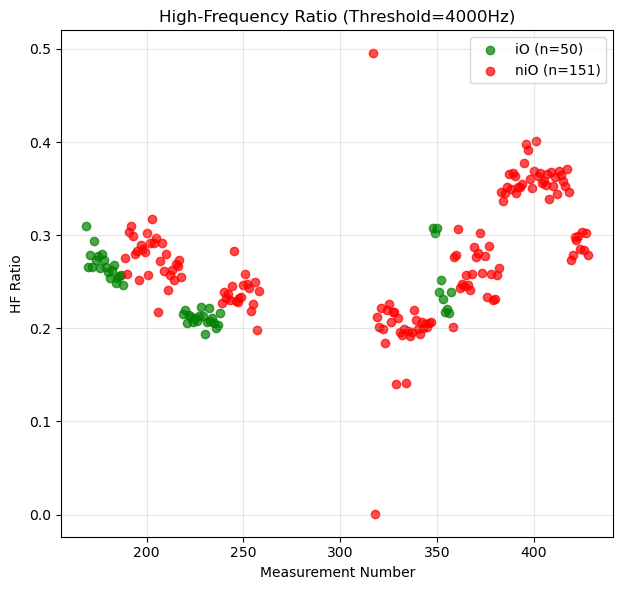


Example analysis for measurement 169:


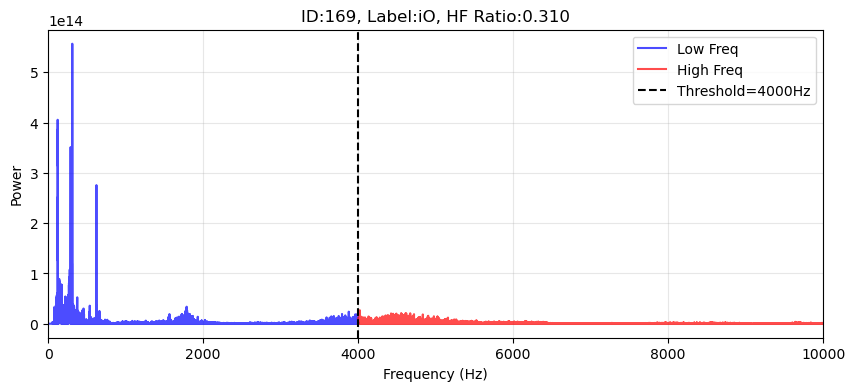


Usage: analyze_single_hf(169)
HF Ratio = High Freq Energy / Total Energy (0-1)


In [ ]:

# =============================================================================
FREQ_THRESHOLD = 500  # <-- Change this value as needed
# =============================================================================

def calculate_hf_ratio(fft_df):
    """Calculate high-frequency energy ratio"""
    # Get positive frequencies and power
    pos_mask = fft_df['Frequency'] > 0
    frequencies = fft_df[pos_mask]['Frequency'].values
    power = fft_df[pos_mask]['FFT_Magnitude'].values ** 2
    
    # Calculate energy in each band
    low_energy = np.sum(power[frequencies < FREQ_THRESHOLD])
    high_energy = np.sum(power[frequencies >= FREQ_THRESHOLD])
    total_energy = low_energy + high_energy
    
    return high_energy / total_energy if total_energy > 0 else 0.0

def analyze_all_hf_ratio():
    """Analyze HF ratio for all audio files"""
    hf_ratio_list = []
    measurement_list = []
    label_list = []
    
    print(f"Calculating HF Ratio for {len(Audio_list_fft)} files (Threshold={FREQ_THRESHOLD}Hz)...")
    
    for audio_fft in tqdm(Audio_list_fft):
        measurement_number = audio_fft['id']
        fft_df = audio_fft['audio']
        original_label = audio_fft['label']
        
        hf_ratio = calculate_hf_ratio(fft_df)
        
        hf_ratio_list.append(hf_ratio)
        measurement_list.append(measurement_number)
        label_list.append(original_label)
    
    hf_ratio_df = pd.DataFrame({
        'Measurement Number': measurement_list,
        'HF Ratio': hf_ratio_list,
        'Label': label_list
    })
    
    return hf_ratio_df

def plot_hf_ratio(hf_ratio_df):
    """Plot HF ratio results"""
    color_map = {'iO': 'green', 'niO': 'red'}
    
    plt.figure(figsize=(12, 6))
    
    # Scatter plot
    plt.subplot(1, 2, 1)
    for label in hf_ratio_df['Label'].unique():
        subset = hf_ratio_df[hf_ratio_df['Label'] == label]
        color = color_map.get(label, 'blue')
        plt.scatter(subset['Measurement Number'], subset['HF Ratio'],
                    color=color, label=f'{label} (n={len(subset)})', alpha=0.7)
    plt.xlabel('Measurement Number')
    plt.ylabel('HF Ratio')
    plt.title(f'High-Frequency Ratio (Threshold={FREQ_THRESHOLD}Hz)')
    plt.legend()
    plt.grid(True, alpha=0.3)  
    plt.tight_layout()
    plt.show()

def analyze_single_hf(measurement_id):
    """Analyze single measurement HF ratio"""
    target_data = None
    for data in Audio_list_fft:
        if data['id'] == measurement_id:
            target_data = data
            break
    
    if target_data is None:
        print(f"Measurement {measurement_id} not found!")
        return
    
    fft_df = target_data['audio']
    label = target_data['label']
    hf_ratio = calculate_hf_ratio(fft_df)
    
    # Plot
    plt.figure(figsize=(10, 4))
    pos_mask = fft_df['Frequency'] > 0
    freq = fft_df[pos_mask]['Frequency'].values
    power = fft_df[pos_mask]['FFT_Magnitude'].values ** 2
    
    low_mask = freq < FREQ_THRESHOLD
    plt.plot(freq[low_mask], power[low_mask], 'b-', alpha=0.7, label='Low Freq')
    plt.plot(freq[~low_mask], power[~low_mask], 'r-', alpha=0.7, label='High Freq')
    plt.axvline(x=FREQ_THRESHOLD, color='black', linestyle='--', label=f'Threshold={FREQ_THRESHOLD}Hz')
    
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.title(f'ID:{measurement_id}, Label:{label}, HF Ratio:{hf_ratio:.3f}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 10000)
    plt.show()
    
    return hf_ratio

def print_hf_stats(hf_ratio_df):
    """Print HF ratio statistics"""
    print(f"\nHIGH-FREQUENCY RATIO RESULTS (THRESHOLD = {FREQ_THRESHOLD} Hz):")
    print("-" * 60)
    
    for label in hf_ratio_df['Label'].unique():
        subset = hf_ratio_df[hf_ratio_df['Label'] == label]
        stats = subset['HF Ratio']
        print(f"{label}: Mean={stats.mean():.3f}, Std={stats.std():.3f}, Count={len(subset)}")
    
    overall = hf_ratio_df['HF Ratio']
    print(f"ALL: Mean={overall.mean():.3f}, Std={overall.std():.3f}")

# =============================================================================
# MAIN EXECUTION
# =============================================================================
hf_ratio_df = analyze_all_hf_ratio()
print_hf_stats(hf_ratio_df)
plot_hf_ratio(hf_ratio_df)

# Example single analysis
if len(Audio_list_fft) > 0:
    first_id = Audio_list_fft[0]['id']
    print(f"\nExample analysis for measurement {first_id}:")
    analyze_single_hf(first_id)

print(f"\nUsage: analyze_single_hf(169)")
print(f"HF Ratio = High Freq Energy / Total Energy (0-1)")

Analyze the energy proportion within a specific frequency band (e.g., 500-2000 Hz) relative to the total signal energy.

Analyzing frequency band: 500-2000 Hz
To change band, modify: FREQ_LOW and FREQ_HIGH
--------------------------------------------------
Calculating Band Ratio for 201 files (500-2000Hz)...


100%|██████████| 201/201 [00:22<00:00,  8.93it/s]



FREQUENCY BAND RATIO RESULTS (500-2000 Hz):
------------------------------------------------------------
iO: Mean=0.153, Std=0.032, Count=50
niO: Mean=0.182, Std=0.033, Count=151
ALL: Mean=0.175, Std=0.035


C:\Users\13370\AppData\Local\Temp\ipykernel_5816\2501118334.py:70: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_label, labels=labels)


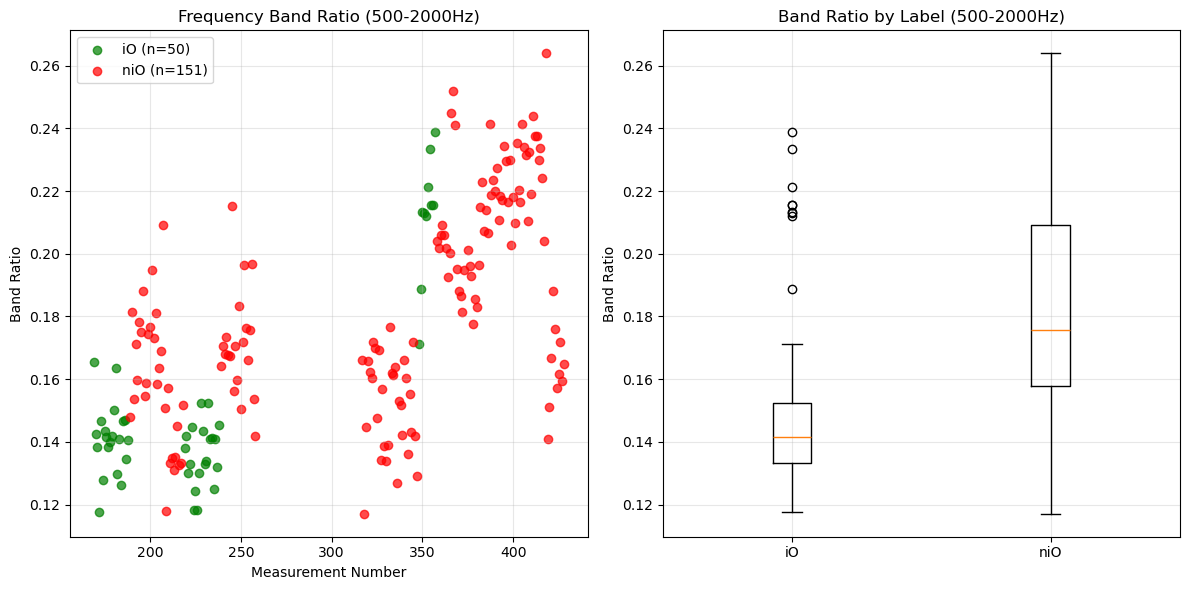


Example analysis for measurement 169:


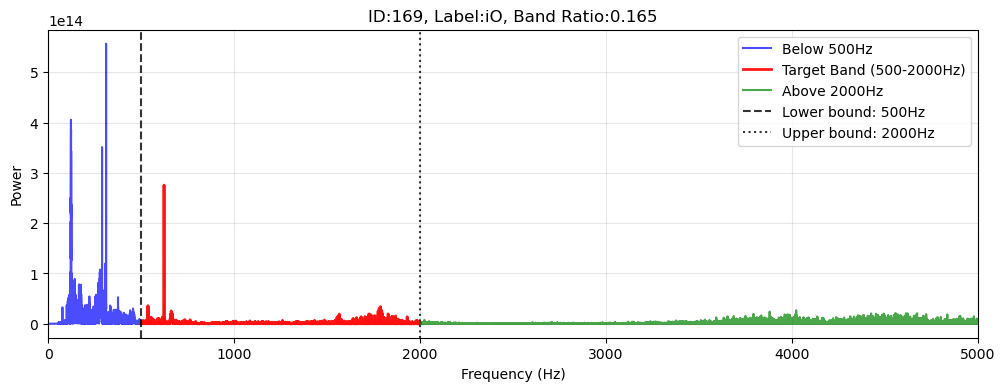


Frequency Band Analysis for Measurement 169:
Label: iO
Target Band: 500-2000 Hz
Band Ratio: 0.1654 (16.5%)
Energy Breakdown:
  Below 500Hz: 41.1%
  Band 500-2000Hz: 16.5%
  Above 2000Hz: 42.4%

Usage: analyze_single_band(169)
Band Ratio = Band Energy / Total Energy (0-1)
Current band: 500-2000 Hz

To analyze different bands, change:
FREQ_LOW = 100; FREQ_HIGH = 500   # Low freq band
FREQ_LOW = 500; FREQ_HIGH = 2000  # Mid freq band
FREQ_LOW = 2000; FREQ_HIGH = 5000 # High freq band


In [77]:


# =============================================================================
FREQ_LOW = 500   # <-- Lower frequency bound
FREQ_HIGH = 2000 # <-- Upper frequency bound
# =============================================================================

def calculate_band_ratio(fft_df):
    """Calculate frequency band energy ratio"""
    # Get positive frequencies and power
    pos_mask = fft_df['Frequency'] > 0
    frequencies = fft_df[pos_mask]['Frequency'].values
    power = fft_df[pos_mask]['FFT_Magnitude'].values ** 2
    
    # Calculate energy in target band and total energy
    band_mask = (frequencies >= FREQ_LOW) & (frequencies <= FREQ_HIGH)
    band_energy = np.sum(power[band_mask])
    total_energy = np.sum(power)
    
    return band_energy / total_energy if total_energy > 0 else 0.0

def analyze_all_band_ratio():
    """Analyze frequency band ratio for all audio files"""
    band_ratio_list = []
    measurement_list = []
    label_list = []
    
    print(f"Calculating Band Ratio for {len(Audio_list_fft)} files ({FREQ_LOW}-{FREQ_HIGH}Hz)...")
    
    for audio_fft in tqdm(Audio_list_fft):
        measurement_number = audio_fft['id']
        fft_df = audio_fft['audio']
        original_label = audio_fft['label']
        
        band_ratio = calculate_band_ratio(fft_df)
        
        band_ratio_list.append(band_ratio)
        measurement_list.append(measurement_number)
        label_list.append(original_label)
    
    band_ratio_df = pd.DataFrame({
        'Measurement Number': measurement_list,
        'Band Ratio': band_ratio_list,
        'Label': label_list
    })
    
    return band_ratio_df

def plot_band_ratio(band_ratio_df):
    """Plot frequency band ratio results"""
    color_map = {'iO': 'green', 'niO': 'red'}
    
    plt.figure(figsize=(12, 6))
    
    # Scatter plot
    plt.subplot(1, 2, 1)
    for label in band_ratio_df['Label'].unique():
        subset = band_ratio_df[band_ratio_df['Label'] == label]
        color = color_map.get(label, 'blue')
        plt.scatter(subset['Measurement Number'], subset['Band Ratio'],
                    color=color, label=f'{label} (n={len(subset)})', alpha=0.7)
    plt.xlabel('Measurement Number')
    plt.ylabel('Band Ratio')
    plt.title(f'Frequency Band Ratio ({FREQ_LOW}-{FREQ_HIGH}Hz)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Box plot
    plt.subplot(1, 2, 2)
    labels = band_ratio_df['Label'].unique()
    data_by_label = [band_ratio_df[band_ratio_df['Label'] == label]['Band Ratio'] for label in labels]
    plt.boxplot(data_by_label, labels=labels)
    plt.ylabel('Band Ratio')
    plt.title(f'Band Ratio by Label ({FREQ_LOW}-{FREQ_HIGH}Hz)')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def analyze_single_band(measurement_id):
    """Analyze single measurement frequency band ratio"""
    target_data = None
    for data in Audio_list_fft:
        if data['id'] == measurement_id:
            target_data = data
            break
    
    if target_data is None:
        print(f"Measurement {measurement_id} not found!")
        return
    
    fft_df = target_data['audio']
    label = target_data['label']
    band_ratio = calculate_band_ratio(fft_df)
    
    # Plot with frequency bands
    plt.figure(figsize=(12, 4))
    pos_mask = fft_df['Frequency'] > 0
    freq = fft_df[pos_mask]['Frequency'].values
    power = fft_df[pos_mask]['FFT_Magnitude'].values ** 2
    
    # Define frequency regions
    below_mask = freq < FREQ_LOW
    band_mask = (freq >= FREQ_LOW) & (freq <= FREQ_HIGH)
    above_mask = freq > FREQ_HIGH
    
    # Plot different frequency regions
    plt.plot(freq[below_mask], power[below_mask], 'b-', alpha=0.7, 
             label=f'Below {FREQ_LOW}Hz')
    plt.plot(freq[band_mask], power[band_mask], 'r-', alpha=0.9, linewidth=2,
             label=f'Target Band ({FREQ_LOW}-{FREQ_HIGH}Hz)')
    plt.plot(freq[above_mask], power[above_mask], 'g-', alpha=0.7, 
             label=f'Above {FREQ_HIGH}Hz')
    
    # Mark frequency boundaries
    plt.axvline(x=FREQ_LOW, color='black', linestyle='--', alpha=0.8, 
                label=f'Lower bound: {FREQ_LOW}Hz')
    plt.axvline(x=FREQ_HIGH, color='black', linestyle=':', alpha=0.8, 
                label=f'Upper bound: {FREQ_HIGH}Hz')
    
    # Highlight target band
    band_freq = freq[band_mask]
    band_power = power[band_mask]
    if len(band_freq) > 0:
        plt.fill_between(band_freq, band_power, alpha=0.3, color='red')
    
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.title(f'ID:{measurement_id}, Label:{label}, Band Ratio:{band_ratio:.3f}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(0, max(5000, FREQ_HIGH * 2))  # Dynamic x-limit
    plt.show()
    
    # Calculate energy breakdown
    below_energy = np.sum(power[below_mask])
    band_energy = np.sum(power[band_mask])
    above_energy = np.sum(power[above_mask])
    total_energy = below_energy + band_energy + above_energy
    
    print(f"\nFrequency Band Analysis for Measurement {measurement_id}:")
    print(f"Label: {label}")
    print(f"Target Band: {FREQ_LOW}-{FREQ_HIGH} Hz")
    print(f"Band Ratio: {band_ratio:.4f} ({band_ratio*100:.1f}%)")
    print(f"Energy Breakdown:")
    print(f"  Below {FREQ_LOW}Hz: {below_energy/total_energy*100:.1f}%")
    print(f"  Band {FREQ_LOW}-{FREQ_HIGH}Hz: {band_energy/total_energy*100:.1f}%")
    print(f"  Above {FREQ_HIGH}Hz: {above_energy/total_energy*100:.1f}%")
    
    return band_ratio

def print_band_stats(band_ratio_df):
    """Print frequency band ratio statistics"""
    print(f"\nFREQUENCY BAND RATIO RESULTS ({FREQ_LOW}-{FREQ_HIGH} Hz):")
    print("-" * 60)
    
    for label in band_ratio_df['Label'].unique():
        subset = band_ratio_df[band_ratio_df['Label'] == label]
        stats = subset['Band Ratio']
        print(f"{label}: Mean={stats.mean():.3f}, Std={stats.std():.3f}, Count={len(subset)}")
    
    overall = band_ratio_df['Band Ratio']
    print(f"ALL: Mean={overall.mean():.3f}, Std={overall.std():.3f}")

# =============================================================================
# MAIN EXECUTION
# =============================================================================
print(f"Analyzing frequency band: {FREQ_LOW}-{FREQ_HIGH} Hz")
print("To change band, modify: FREQ_LOW and FREQ_HIGH")
print("-" * 50)

band_ratio_df = analyze_all_band_ratio()
print_band_stats(band_ratio_df)
plot_band_ratio(band_ratio_df)

# Example single analysis
if len(Audio_list_fft) > 0:
    first_id = Audio_list_fft[0]['id']
    print(f"\nExample analysis for measurement {first_id}:")
    analyze_single_band(first_id)

print(f"\nUsage: analyze_single_band(169)")
print(f"Band Ratio = Band Energy / Total Energy (0-1)")
print(f"Current band: {FREQ_LOW}-{FREQ_HIGH} Hz")

# Quick band change examples
print(f"\nTo analyze different bands, change:")
print(f"FREQ_LOW = 100; FREQ_HIGH = 500   # Low freq band")
print(f"FREQ_LOW = 500; FREQ_HIGH = 2000  # Mid freq band") 
print(f"FREQ_LOW = 2000; FREQ_HIGH = 5000 # High freq band")

### Entrope

Entropy = -Σ(p_i * log2(p_i)) where p_i is normalized power

Calculating Spectral Entropy for 201 files...


100%|██████████| 201/201 [00:24<00:00,  8.34it/s]



SPECTRAL ENTROPY RESULTS:
----------------------------------------
iO: Mean=14.491, Std=0.672, Count=50
niO: Mean=14.952, Std=0.653, Count=151
ALL: Mean=14.837, Std=0.686


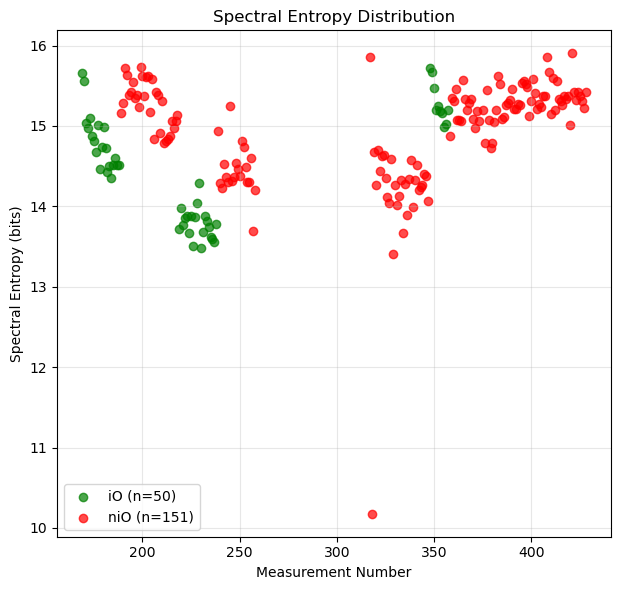


Example analysis for measurement 169:


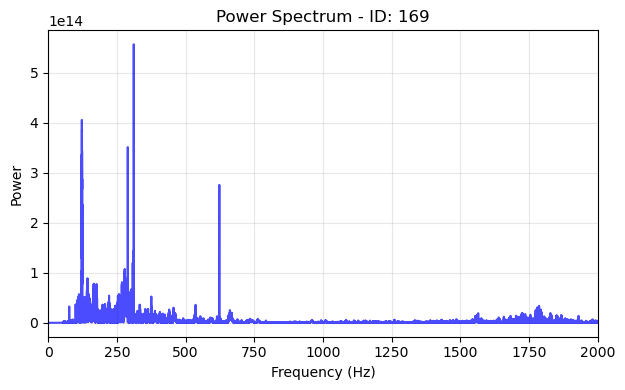


Spectral Entropy Analysis for Measurement 169:
Label: iO
Spectral Entropy: 15.6536 bits


In [61]:


def calculate_spectral_entropy(fft_df):
    """Calculate spectral entropy from FFT data"""
    # Get positive frequencies and power
    pos_mask = fft_df['Frequency'] > 0
    power = fft_df[pos_mask]['FFT_Magnitude'].values ** 2
    
    # Normalize to probability distribution
    total_power = np.sum(power)
    if total_power == 0:
        return 0.0
    
    prob_dist = power / total_power
    
    # Remove zero values to avoid log(0)
    prob_dist = prob_dist[prob_dist > 0]
    
    # Calculate Shannon entropy
    entropy = -np.sum(prob_dist * np.log2(prob_dist))
    
    return entropy

def analyze_all_entropy():
    """Analyze spectral entropy for all audio files"""
    entropy_list = []
    measurement_list = []
    label_list = []
    
    print(f"Calculating Spectral Entropy for {len(Audio_list_fft)} files...")
    
    for audio_fft in tqdm(Audio_list_fft):
        measurement_number = audio_fft['id']
        fft_df = audio_fft['audio']
        original_label = audio_fft['label']
        
        entropy = calculate_spectral_entropy(fft_df)
        
        entropy_list.append(entropy)
        measurement_list.append(measurement_number)
        label_list.append(original_label)
    
    entropy_df = pd.DataFrame({
        'Measurement Number': measurement_list,
        'Spectral Entropy': entropy_list,
        'Label': label_list
    })
    
    return entropy_df

def plot_entropy(entropy_df):
    """Plot entropy results"""
    color_map = {'iO': 'green', 'niO': 'red'}
    
    plt.figure(figsize=(12, 6))
    
    # Scatter plot
    plt.subplot(1, 2, 1)
    for label in entropy_df['Label'].unique():
        subset = entropy_df[entropy_df['Label'] == label]
        color = color_map.get(label, 'blue')
        plt.scatter(subset['Measurement Number'], subset['Spectral Entropy'],
                    color=color, label=f'{label} (n={len(subset)})', alpha=0.7)
    plt.xlabel('Measurement Number')
    plt.ylabel('Spectral Entropy (bits)')
    plt.title('Spectral Entropy Distribution')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def analyze_single_entropy(measurement_id):
    """Analyze single measurement entropy"""
    target_data = None
    for data in Audio_list_fft:
        if data['id'] == measurement_id:
            target_data = data
            break
    
    if target_data is None:
        print(f"Measurement {measurement_id} not found!")
        return
    
    fft_df = target_data['audio']
    label = target_data['label']
    entropy = calculate_spectral_entropy(fft_df)
    
    # Plot power spectrum and probability distribution
    plt.figure(figsize=(12, 4))
    
    pos_mask = fft_df['Frequency'] > 0
    freq = fft_df[pos_mask]['Frequency'].values
    power = fft_df[pos_mask]['FFT_Magnitude'].values ** 2
    prob_dist = power / np.sum(power)
    
    # Plot 1: Power spectrum
    plt.subplot(1, 2, 1)
    plt.plot(freq, power, 'b-', alpha=0.7)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.title(f'Power Spectrum - ID: {measurement_id}')
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 2000)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSpectral Entropy Analysis for Measurement {measurement_id}:")
    print(f"Label: {label}")
    print(f"Spectral Entropy: {entropy:.4f} bits")
    
    return entropy

def print_entropy_stats(entropy_df):
    """Print entropy statistics"""
    print(f"\nSPECTRAL ENTROPY RESULTS:")
    print("-" * 40)
    
    for label in entropy_df['Label'].unique():
        subset = entropy_df[entropy_df['Label'] == label]
        stats = subset['Spectral Entropy']
        print(f"{label}: Mean={stats.mean():.3f}, Std={stats.std():.3f}, Count={len(subset)}")
    
    overall = entropy_df['Spectral Entropy']
    print(f"ALL: Mean={overall.mean():.3f}, Std={overall.std():.3f}")

# =============================================================================
# MAIN EXECUTION
# =============================================================================
entropy_df = analyze_all_entropy()
print_entropy_stats(entropy_df)
plot_entropy(entropy_df)

# Example single analysis
if len(Audio_list_fft) > 0:
    first_id = Audio_list_fft[0]['id']
    print(f"\nExample analysis for measurement {first_id}:")
    analyze_single_entropy(first_id)


### Weldqas part

# read single file

file_path = os.path.join(Weldqas_path,"169.csv")
df = pd.read_csv(file_path)
#pd.set_option('display.max_rows', None)
print(df)
df.info()
x = df["Time"]
y = df["M"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("M ")


      Time [s]  Current [A]  Voltage [V]  Wire [m/min]
0     0.000000         11.7         0.83           0.0
1     0.000043         12.7         0.68           0.0
2     0.000085         13.2         0.68           0.0
3     0.000128         15.6         0.54           0.0
4     0.000170         15.2         0.00           0.0
...        ...          ...          ...           ...
4696  0.199583         18.1         0.00           0.0
4697  0.199626         16.1        -0.54           0.0
4698  0.199668         14.2        -0.54           0.0
4699  0.199711         12.7        -0.54           0.0
4700  0.199754         11.2        -0.54           0.0

[4701 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time [s]      4701 non-null   float64
 1   Current [A]   4701 non-null   float64
 2   Voltage [V]   4701 non-null   fl

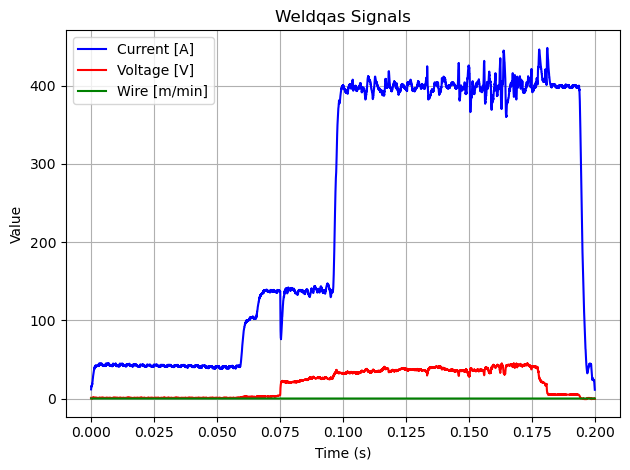

In [ ]:
# read single file

file_path = os.path.join(Weldqas_path,"169.csv")
df = pd.read_csv(file_path)
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')
print(df)
df.info()
"""
plt.figure(1)
x = df["Time [s]"]
y = df["Current [A]"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.figure(2)
x = df["Time [s]"]
y = df["Voltage [V]"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.figure(3)
x = df["Time [s]"]
y = df["Wire [m/min]"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("Wire (m/min)")
"""
plt.plot(df["Time [s]"], df["Current [A]"], label="Current [A]", color="blue")
plt.plot(df["Time [s]"], df["Voltage [V]"], label="Voltage [V]", color="red")
plt.plot(df["Time [s]"], df["Wire [m/min]"], label="Wire [m/min]", color="green")

plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.title("Weldqas Signals")
plt.legend()  
plt.grid(True)
plt.tight_layout()
plt.show()


